<h1 style="text-align:center">   
      <font color = purple >
            <span style='font-family:Georgia'>
                Lead Scoring : A Logistric Regression Case Study 
            </span>   
        </font>    
</h1>
<h3 style="text-align:right">   
      <font color = gray >
            <span style='font-family:Georgia'>
                By : Chetan Nandanwar
            </span>   
        </font>    
</h3>
<hr style="width:100%;height:5px;border-width:0;color:gray;background-color:gray">
<center>
</center>

<a id="toc"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">
    <span style='font-family:Georgia'>
    Table of Content
    </span>
</h1>
<span style='font-family:Georgia'>
    <ul>
        <li><a href='#intro'>1. Introduction</a></li>
        <ul>
            <li><a href='#background'>1.1 Problem Statement</a></li>
            <li><a href='#goal'>1.2 Business Goal</a></li>
            <li><a href='#datadict'>1.3 Data Dictionary</a></li>
        </ul>
        <li><a href='#libraries'>2. Importing Libraries</a></li>
        <li><a href='#import'>3. Reading & Understanding the data</a></li>
        <ul>
            <li><a href='#input'>3.1 Importing the input file</a></li>
            <li><a href='#inspect'>3.2 Inspecting the dataframe</a></li>
            <li><a href='#nullcal'>3.3 Null Value Calculation</a></li>
            <li><a href='#duplicate'>3.4 Duplicate Analysis #duplicate</a></li>
        </ul>      
        <li><a href='#datacleaning'>4. Data Cleaning</a></li>
        <ul>
            <li><a href='#delcol'>4.1 Delete High Null Columns</a></li>
            <li><a href='#colseg'>4.2 Segregating Categorical & Numerical Value</a></li>
            <li><a href='#catnull'>4.3 Categorical Columns Null Value Treatment</a></li>
            <li><a href='#numnull'>4.4 Numerical Columns Null Value Treatment</a></li>
        </ul>
        <li><a href='#eda'>5. Exploratoray Data Analysis</a></li>
        <ul>
            <li><a href='#imbalance'>5.1 Data Imbalance</a></li>
            <li><a href='#graphfunc'>5.2 Graph Functions</a></li>
            <li><a href='#univar'>5.3 Univariate Analysis</a></li>
            <li><a href='#uninumvar'>5.4 Univariate Analysis</a></li>
            <li><a href='#bivar'>5.5 Bivariate Analysis</a></li>
        </ul>
        <li><a href='#dataprep'>6. Data Preparation</a></li>
        <ul>
            <li><a href='#outlier'>6.1 Outliers Treatment</a></li>
            <li><a href='#fconvert'>6.2 Convert Binary Categories</a></li>
            <li><a href='#dummy'>6.3 Dummy Variables</a></li>
            <li><a href='#split'>6.4 Train - Test Split</a></li>
            <li><a href='#scaling'>6.5 Feature Scaling</a></li>
        </ul>
        <li><a href='#modelbuild'>7. Model Building</a></li>
        <ul>
            <li><a href='#RFE'>7.1 RFE for Feature Reduction</a></li>
            <li><a href='#manual'>7.2 Manual Feature Reduction</a></li>
        </ul>
        <li><a href='#modeleval1'>8. Model Evalution : Train Dataset</a></li>
        <ul>
            <li><a href='#predprob'>8.1 Predicted Probability Calculation</a></li>
            <li><a href='#confusion'>8.2 Confusion Matrix</a></li>
            <li><a href='#ROC'>8.3 ROC Curve </a></li>
            <li><a href='#tradeoff'>8.4 Precision - Recall Trade off</a></li>
        </ul>
        <li><a href='#modeleval2'>9. Model Evalution : Test Dataset</a></li>
        <li><a href='#conclusion'>10. Conclusion</a></li>
        <ul>
            <li><a href='#params'>10.1 Model Features / Predictors</a></li>
			<li><a href='#summary'>10.2 Model Summary</a></li>
        </ul>
    </ul>
</span>

<a id="intro"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. Introduction:
            </span>   
        </font>    
</h1>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

<a id="background"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.1 Problem Statement :
            </span>   
        </font>    
</h2>
<p style="text-indent: 25px;">
    <span style='font-family:Georgia'>
        An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.  
        </span>
</p>
<p style="text-indent: 25px;">
    <span style='font-family:Georgia'>
        The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.  
        </span>
</p>
<p style="text-indent: 25px;">
    <span style='font-family:Georgia'>
        Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
        </span>
</p>

<a id="goal"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.2 Business Goal :
            </span>   
        </font>    
</h2>
<p style="text-indent: 25px;">
    <span style='font-family:Georgia'>
        X Education want to develop a model to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br><br>
        Goal of the Case Study is :
    </span>
</p>
<span style='font-family:Georgia'>
    <ol>
        <li>Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.</li>
        <li>There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.</li>
    </ol>
</span>

<a id="intro"></a>
<h1>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.3 Data Dictonary:
            </span>   
        </font>    
</h1>


- `Prospect ID`:	A unique ID with which the customer is identified.
- `Lead Number`:	A lead number assigned to each lead procured.
- `Lead Origin`:	The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
- `Lead Source`:	The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
- `Do Not Email`:	An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
- `Do Not Call`:	An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
- `Converted`:	The target variable. Indicates whether a lead has been successfully converted or not.
- `TotalVisits`:	The total number of visits made by the customer on the website.
- `Total Time`: Spent on Website	The total time spent by the customer on the website.
- `Page Views Per Visit`:	Average number of pages on the website viewed during the visits.
- `Last Activity`:	Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
- `Country`:	The country of the customer.
- `Specialization`:	The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
- `How did you hear about X Education`:	The source from which the customer heard about X Education.
- `What is your current occupation`:	Indicates whether the customer is a student, umemployed or employed.
- `What matters most to you in choosing this course`:	An option selected by the customer indicating what is their main motto behind doing this course.
- `Indicating whether the customer had seen the ad in any of the listed items`:
    - Search	
    - Magazine	
    - Newspaper Article	
    - X Education Forums	
    - Newspaper	
    - Digital Advertisement	
    - Through Recommendations	Indicates whether the customer came in through recommendations.
- `Receive More Updates About Our Courses`:	Indicates whether the customer chose to receive more updates about the courses.
- `Tags`:	Tags assigned to customers indicating the current status of the lead.
- `Lead Quality`:	Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
- `Update me on Supply Chain Content`:	Indicates whether the customer wants updates on the Supply Chain Content.
- `Get updates on DM Content`:	Indicates whether the customer wants updates on the DM Content.
- `Lead Profile`:	A lead level assigned to each customer based on their profile.
- `City`:	The city of the customer.
- `An index and score assigned to each customer based on their activity and their profile`:
    - Asymmetrique Activity Index
    - Asymmetrique Profile Index	
    - Asymmetrique Activity Score	
    - Asymmetrique Profile Score	
- `I agree to pay the amount through cheque`:	Indicates whether the customer has agreed to pay the amount through cheque or not.
- `a free copy of Mastering The Interview`:	Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
- `Last Notable Activity`:	The last notable activity performed by the student.


<a id="libraries"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. Importing Libraries:
            </span>   
        </font>    
</h1>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

In [1]:
#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',50)
#from collections import Counter

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Plot Style
sns.set()
style.use('seaborn-poster')
style.use('fivethirtyeight')

# Machine Learning Libraries

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Supress Warnings!
import warnings
warnings.filterwarnings('ignore')

<a id="import"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Reading & Understanding the data
            </span>   
        </font>    
</h1>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

<a id="input"></a>
<h2 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.1 Reading the Input file
            </span>   
        </font>    
</h2>

In [2]:
lead = pd.read_csv("Leads.csv") #Naming the dataset as lead 
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

<a id="inspect"></a>
<h2 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.2 Inspect Dataframe
            </span>   
        </font>    
</h2>

In [3]:
#database dimension
print("Database dimension     :",lead.shape)
print("Database size          :",lead.size)
print("Number of Row          :",len(lead.index))
print("Number of Columns      :",len(lead.columns))

Database dimension     : (9240, 37)
Database size          : 341880
Number of Row          : 9240
Number of Columns      : 37


In [4]:
#checking numerical columns statistics
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
#info about the column types etc. 
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
         The data types of the columns are float, integer and object type. We can see there are some null values in the column. Let's inspect the null values first 
    </span>    
</div>

<a id="nullcal"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.3 Null Value Calculation
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
         There are quite a few columns which have 'Select' as one of the categories. This is because the person has not filled that field. We will replace this field with NaN value
    </span>    
</div>

In [6]:
lead = lead.replace('Select', np.nan)

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            3.3.1 Column wise Null Value calculation
            </span>   
        </font>    
</h3>

In [7]:
#Column wise null values in train data set 
null_percentage = pd.DataFrame(round((lead.isnull().sum())*100/lead.shape[0],2)).reset_index()
null_percentage.columns = ['Column Name', 'Null Values in Percentage']
null_value = pd.DataFrame(lead.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
null_lead = pd.merge(null_value, null_percentage, on='Column Name')
null_lead.sort_values("Null Values", ascending = False)

Column Name  Null Values  \
13             How did you hear about X Education         7250   
28                                   Lead Profile         6855   
25                                   Lead Quality         4767   
33                     Asymmetrique Profile Score         4218   
32                    Asymmetrique Activity Score         4218   
30                    Asymmetrique Activity Index         4218   
31                     Asymmetrique Profile Index         4218   
29                                           City         3669   
12                                 Specialization         3380   
24                                           Tags         3353   
15  What matters most to you in choosing a course         2709   
14                What is your current occupation         2690   
11                                        Country         2461   
9                            Page Views Per Visit          137   
7                                     TotalVisits          137   
10                                  Last Activity          103   
3                                     Lead Source           36   
23         Receive More Updates About Our Courses            0   
34       I agree to pay the amount through cheque            0   
27                      Get updates on DM Content            0   
26              Update me on Supply Chain Content            0   
35         A free copy of Mastering The Interview            0   
0                                     Prospect ID            0   
18                              Newspaper Article            0   
22                        Through Recommendations            0   
21                          Digital Advertisement            0   
20                                      Newspaper            0   
19                             X Education Forums            0   
1                                     Lead Number            0   
17                                       Magazine            0   
16                                         Search            0   
8                     Total Time Spent on Website            0   
6                                       Converted            0   
5                                     Do Not Call            0   
4                                    Do Not Email            0   
2                                     Lead Origin            0   
36                          Last Notable Activity            0   

    Null Values in Percentage  
13                      78.46  
28                      74.19  
25                      51.59  
33                      45.65  
32                      45.65  
30                      45.65  
31                      45.65  
29                      39.71  
12                      36.58  
24                      36.29  
15                      29.32  
14                      29.11  
11                      26.63  
9                        1.48  
7                        1.48  
10                       1.11  
3                        0.39  
23                       0.00  
34                       0.00  
27                       0.00  
26                       0.00  
35                       0.00  
0                        0.00  
18                       0.00  
22                       0.00  
21                       0.00  
20                       0.00  
19                       0.00  
1                        0.00  
17                       0.00  
16                       0.00  
8                        0.00  
6                        0.00  
5                        0.00  
4                        0.00  
2                        0.00  
36                       0.00

In [8]:
# plotting the null value percentage

null_lead = pd.DataFrame((lead.isnull().sum())*100/lead.shape[0]).reset_index()
null_lead.columns = ['Column Name', 'Null Values Percentage']
fig = px.line(null_lead,x='Column Name', y='Null Values Percentage',markers =True,
              title = 'Percentage of Null values')
fig.update_layout(
     font_color="black",
    margin=dict(l=20, r=20, t=50, b=20),
       title_font_family="Times New Roman")     
fig.add_hline(y=40, line_width=3, line_dash="dash", line_color="red") # 40% line 
fig.show() 

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            3.3.2 Row wise Null Value calculation
            </span>   
        </font>    
</h3>

In [9]:
Row_Null50_Count = len(lead[lead.isnull().sum(axis=1)/lead.shape[1]>0.5])
print( 'Total number of rows with more than 50% null values are : ', Row_Null50_Count)

Total number of rows with more than 50% null values are :  0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          There are 17 columns with null values. 7 columns have more than 40% unknowns which we should drop as imputing these columns will give wrong results. No row has more than 50% null values.  
    </span>    
</div>

<a id="duplicate"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.4 Duplicate Analysis
            </span>   
        </font>    
</h2>

In [10]:
print("Total number of duplicate values in Prospect ID column :" , lead.duplicated(subset = 'Prospect ID').sum())
print("Total number of duplicate values in Lead Number column :" , lead.duplicated(subset = 'Lead Number').sum())

Total number of duplicate values in Prospect ID column : 0
Total number of duplicate values in Lead Number column : 0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
         Both the Prospect ID and Lead number have unique entries 
        </span>    
</div>

<a id="datacleaning"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            4. Data Cleaning
            </span>   
        </font>    
</h1>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

<a id="delcol"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.1 Delete High Null Columns
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
          Prospect ID and Lead Number are of no use to us. We will also remove the columns which has more than 45% Null Values. <br>
        Also, some of the variables like Lead Quality, Tags, Asymmetrique scores and profile etc. can also be dropped<br>
        <br>
        <b>Thus, we can drop these columns too.</b> 
    </span>    
</div>

In [11]:
cols_to_drop = ['Prospect ID','Lead Number','How did you hear about X Education','Lead Profile',
                'Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score',
               'Asymmetrique Activity Index','Asymmetrique Profile Index','Tags','Last Notable Activity']

In [12]:
#dropping unnecessary columns

lead.drop(cols_to_drop, 1, inplace = True)

<a id="colseg"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.2 Segregating Categorical & Numerical Values
            </span>   
        </font>    
</h2>

In [13]:
cat_cols = lead.select_dtypes(exclude =["number"]).columns.values
num_cols = lead.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(cat_cols))
print("NUMERICAL FEATURES : \n {} ".format(num_cols)) 

CATEGORICAL FEATURES : 
 ['Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call' 'Last Activity'
 'Country' 'Specialization' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses'
 'Update me on Supply Chain Content' 'Get updates on DM Content' 'City'
 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview'] 


NUMERICAL FEATURES : 
 ['Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit'] 


<a id="catnull"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.3 Categorical Columns Null Value Treatment
            </span>   
        </font>    
</h2>

In [14]:
# Checking unique values and null values for the categorical columns
def cat_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for i in categorical_column:
        df_temp["columns"] = [i]
        df_temp["values"] = [df[i].unique()]
        df_temp["unique_values"] = df[i].nunique()
        df_temp["null_values"] = df[i].isna().sum()
        df_temp["null_percent"] = (df[i].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [15]:
df_cat = cat_info(lead, cat_cols)
df_cat

values  \
columns                                                                                            
City                                           [nan, Mumbai, Thane & Outskirts, Other Metro C...   
Specialization                                 [nan, Business Administration, Media and Adver...   
What matters most to you in choosing a course  [Better Career Prospects, nan, Flexibility & C...   
What is your current occupation                [Unemployed, Student, nan, Working Professiona...   
Country                                        [nan, India, Russia, Kuwait, Oman, United Arab...   
Last Activity                                  [Page Visited on Website, Email Opened, Unreac...   
Lead Source                                    [Olark Chat, Organic Search, Direct Traffic, G...   
Lead Origin                                    [API, Landing Page Submission, Lead Add Form, ...   
Digital Advertisement                                                                  [No, Yes]   
I agree to pay the amount through cheque                                                    [No]   
Get updates on DM Content                                                                   [No]   
Update me on Supply Chain Content                                                           [No]   
Receive More Updates About Our Courses                                                      [No]   
Through Recommendations                                                                [No, Yes]   
Newspaper Article                                                                      [No, Yes]   
Newspaper                                                                              [No, Yes]   
X Education Forums                                                                     [No, Yes]   
Magazine                                                                                    [No]   
Search                                                                                 [No, Yes]   
Do Not Call                                                                            [No, Yes]   
Do Not Email                                                                           [No, Yes]   
A free copy of Mastering The Interview                                                 [No, Yes]   

                                              unique_values null_values  \
columns                                                                   
City                                                      6        3669   
Specialization                                           18        3380   
What matters most to you in choosing a course             3        2709   
What is your current occupation                           6        2690   
Country                                                  38        2461   
Last Activity                                            17         103   
Lead Source                                              21          36   
Lead Origin                                               5           0   
Digital Advertisement                                     2           0   
I agree to pay the amount through cheque                  1           0   
Get updates on DM Content                                 1           0   
Update me on Supply Chain Content                         1           0   
Receive More Updates About Our Courses                    1           0   
Through Recommendations                                   2           0   
Newspaper Article                                         2           0   
Newspaper                                                 2           0   
X Education Forums                                        2           0   
Magazine                                                  1           0   
Search                                                    2           0   
Do Not Call                                               2           0   
Do Not Email                           

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          <ul>
              <li>Some of the columns have only 1 category.Example - Magazine,I agree to pay the amount through cheque etc. These columns will not add any value to the model and can be deleted.</li>              
        </ul>
    </span>    
</div>

In [16]:
# Appending the columns to col_to_drop where only 1 category value is present

cols_to_drop = df_cat[df_cat['unique_values']==1].index.values.tolist() 
cols_to_drop

['I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Magazine']

In [17]:
#dropping the columns with only 1 category 

lead.drop(cols_to_drop, 1, inplace = True)
len(lead.columns)

21

<p>
    <span style='font-family:Georgia'>
          Checking the new null value and column details for Categorical columns
    </span> 
</p>

In [18]:
cat_cols = lead.select_dtypes(exclude =["number"]).columns.values
new_cat = cat_info(lead, cat_cols)
new_cat

values  \
columns                                                                                            
City                                           [nan, Mumbai, Thane & Outskirts, Other Metro C...   
Specialization                                 [nan, Business Administration, Media and Adver...   
What matters most to you in choosing a course  [Better Career Prospects, nan, Flexibility & C...   
What is your current occupation                [Unemployed, Student, nan, Working Professiona...   
Country                                        [nan, India, Russia, Kuwait, Oman, United Arab...   
Last Activity                                  [Page Visited on Website, Email Opened, Unreac...   
Lead Source                                    [Olark Chat, Organic Search, Direct Traffic, G...   
X Education Forums                                                                     [No, Yes]   
Through Recommendations                                                                [No, Yes]   
Digital Advertisement                                                                  [No, Yes]   
Newspaper                                                                              [No, Yes]   
Lead Origin                                    [API, Landing Page Submission, Lead Add Form, ...   
Newspaper Article                                                                      [No, Yes]   
Search                                                                                 [No, Yes]   
Do Not Call                                                                            [No, Yes]   
Do Not Email                                                                           [No, Yes]   
A free copy of Mastering The Interview                                                 [No, Yes]   

                                              unique_values null_values  \
columns                                                                   
City                                                      6        3669   
Specialization                                           18        3380   
What matters most to you in choosing a course             3        2709   
What is your current occupation                           6        2690   
Country                                                  38        2461   
Last Activity                                            17         103   
Lead Source                                              21          36   
X Education Forums                                        2           0   
Through Recommendations                                   2           0   
Digital Advertisement                                     2           0   
Newspaper                                                 2           0   
Lead Origin                                               5           0   
Newspaper Article                                         2           0   
Search                                                    2           0   
Do Not Call                                               2           0   
Do Not Email                                              2           0   
A free copy of Mastering The Interview                    2           0   

                                               null_percent  
columns                                                      
City                                                   39.7  
Specialization                                         36.6  
What matters most to you in choosing a course          29.3  
What is your current occupation                        29.1  
Country                                                26.6  
Last Activity                                           1.1  
Lead Source                                             0.4  
X Education Forums                                      0.0  
Through Recommendations                                 0.0  
Digital Advertisement                                   0.0  
Newspaper          

<p>
    <span style='font-family:Georgia'>
          Now we can proceed with addressing individual columns for null values
    </span> 
</p>

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.1 City
            </span>   
        </font>    
</h3>

In [19]:
lead['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [20]:
# Let's check how City and Country are connected with each other
lead.groupby(['Country','City'])['Country'].count()

Country        City                       
Australia      Mumbai                         6
               Other Cities                   2
               Thane & Outskirts              3
Bahrain        Mumbai                         1
               Other Cities                   2
                                             ..
United States  Other Cities of Maharashtra    5
               Other Metro Cities             4
               Thane & Outskirts              5
               Tier II Cities                 1
Vietnam        Mumbai                         1
Name: Country, Length: 84, dtype: int64

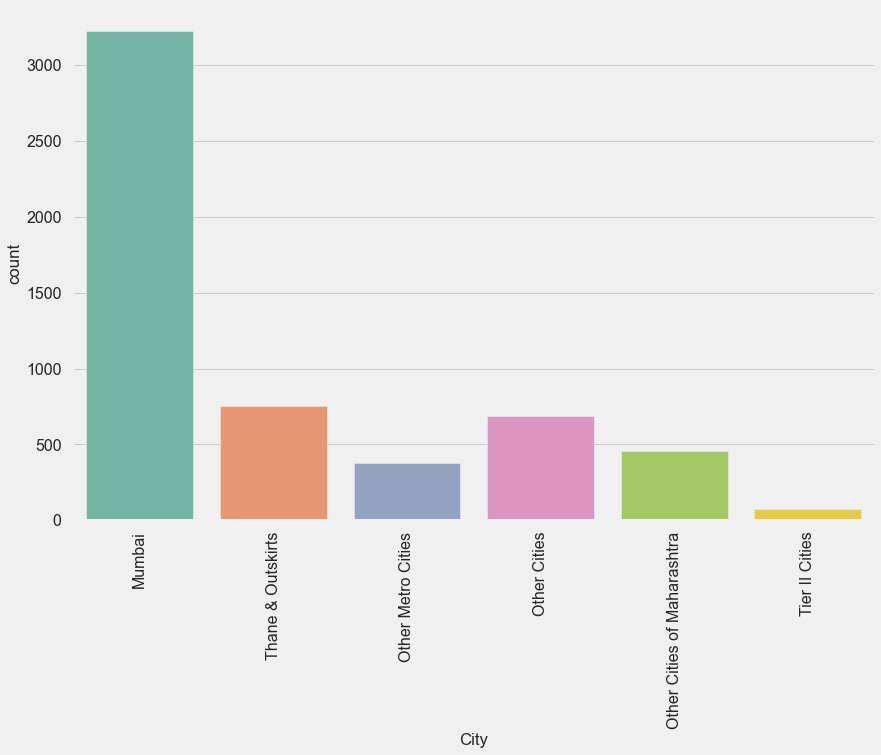

In [21]:
sns.countplot(lead['City'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          As there is almost 40% null values, we cannot impute with mode as it is make the whole data skewed. Also its an online platform so any student can attend it online from anywhere.   
    </span>    
</div>

In [22]:
lead.drop("City",axis=1, inplace = True)
len(lead.columns)

20

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.2 Specialization
            </span>   
        </font>    
</h3>

In [23]:
lead['Specialization'].value_counts(normalize = True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

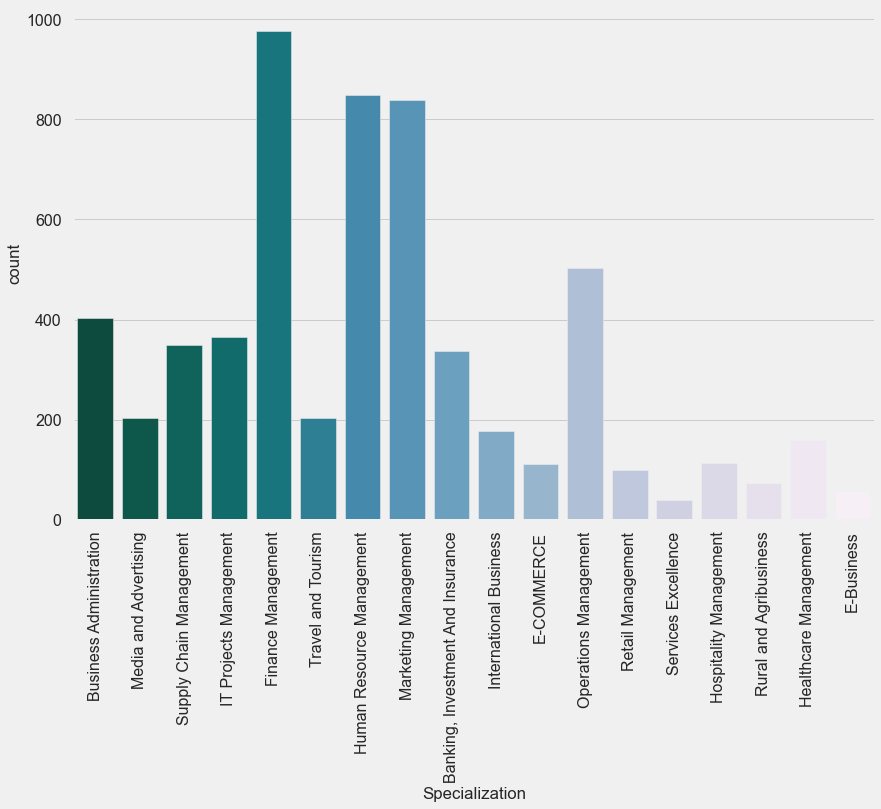

In [24]:
sns.countplot(lead['Specialization'],palette = 'PuBuGn_r')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          We have a lots of Unknown values in specialization so we will mark the nan values as 'Unknown' 
    </span>    
</div>

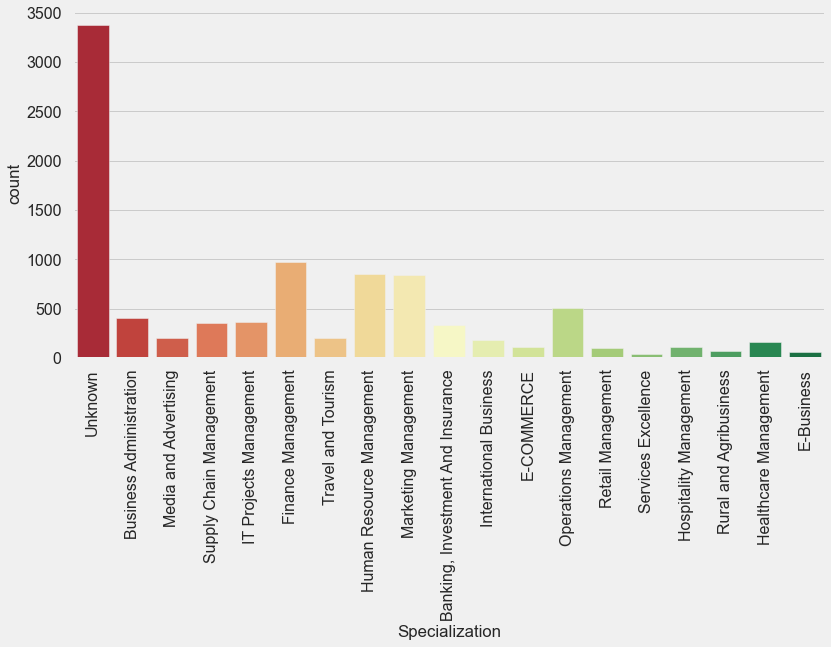

In [25]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Unknown')
plt.figure(figsize=(12,6))
ax = sns.countplot(lead['Specialization'],palette = 'RdYlGn')
plt.xticks(rotation = 90)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.3 What matters most to you in choosing a course
            </span>   
        </font>    
</h3>

In [26]:
lead['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          What matters most to you in choosing a course is skewed, we can delete the column.
    </span>    
</div>

In [27]:
lead.drop('What matters most to you in choosing a course', axis = 1, inplace=True)
len(lead.columns)

19

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.4 What is your current occupation
            </span>   
        </font>    
</h3>

In [28]:
lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          85.5% values are "Unemployed". If we impute the data as "Unemployed" then data will become more skewed. Thus, we will impute the nan values as "Unknown".
    </span>    
</div>

In [29]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unknown')
lead['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              60.606061
Unknown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.5 Country
            </span>   
        </font>    
</h3>

In [30]:
#Let's check how is the Country data distributed
lead['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
South Africa            0.000590
Kuwait                  0.000590
Nigeria                 0.000590
Germany                 0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Philippines             0.000295
Italy                   0.000295
Bangladesh              0.000295
Ghana                   0.000295
Netherlands             0.000295
Belgium                 0.000295
Uganda                  0.000295
Asia/Pacific Region     0.000295
Indonesia               0.000148
Malaysia                0.000148
Sri Lanka 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          Country data is heavily skewed as 95% of the data is of India. Similar to City, Country data is not required for Model building as X-Education is an online platform. Hence we will drop this column
    </span>    
</div>

In [31]:
lead.drop('Country', axis = 1, inplace = True)
len(lead.columns)

18

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.6 Last Activity
            </span>   
        </font>    
</h3>

In [32]:
print("Number of null values in Last Activity column is : ", lead['Last Activity'].isnull().sum())
print("Percentage of null values in Last Activity column is : ", round(lead['Last Activity'].isnull().sum()/lead.shape[0]*100,2))

Number of null values in Last Activity column is :  103
Percentage of null values in Last Activity column is :  1.11


In [33]:
lead['Last Activity'].value_counts(normalize = True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          We will impute the nan values with the mode here , by 'Email Opened'.
    </span>    
</div>

In [34]:
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Email Opened')
print("Number of null values in Last Activity column is : ", lead['Last Activity'].isnull().sum())

Number of null values in Last Activity column is :  0


<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.7 Lead Source
            </span>   
        </font>    
</h3>

In [35]:
print("Number of null values in Lead Source column is : ", lead['Lead Source'].isnull().sum())
print("Percentage of null values in Lead Source column is : ", round(lead['Lead Source'].isnull().sum()/lead.shape[0]*100,2))

Number of null values in Lead Source column is :  36
Percentage of null values in Lead Source column is :  0.39


In [36]:
lead['Lead Source'].value_counts(normalize = True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Social Media          0.021730
Press_Release         0.021730
Live Chat             0.021730
youtubechannel        0.010865
NC_EDM                0.010865
Pay per Click Ads     0.010865
WeLearn               0.010865
welearnblog_Home      0.010865
testone               0.010865
blog                  0.010865
Name: Lead Source, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          We will replace the nan values with 'Google' here. 
    </span>    
</div>

In [37]:
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')
lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')
print("Number of null values in Lead Source column is : ", lead['Lead Source'].isnull().sum())

Number of null values in Lead Source column is :  0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          We have successfully imputed all Categorical Columns. Now let's look into numerical columns. 
    </span>    
</div>

<a id="numnull"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.4 Numerical Columns Null Value Treatment
            </span>   
        </font>    
</h2>

In [38]:
# Checking unique values and null values for the categorical columns
def num_info(df, numeric_column):
    df_result = pd.DataFrame(columns=["columns","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for i in numeric_column:
        df_temp["columns"] = [i]
        df_temp["null_values"] = df[i].isna().sum()
        df_temp["null_percent"] = (df[i].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [39]:
df_num = num_info(lead,num_cols)
df_num

null_values  null_percent
columns                                              
TotalVisits                         137           1.5
Page Views Per Visit                137           1.5
Converted                             0           0.0
Total Time Spent on Website           0           0.0

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.1  Total Visits
            </span>   
        </font>    
</h3>

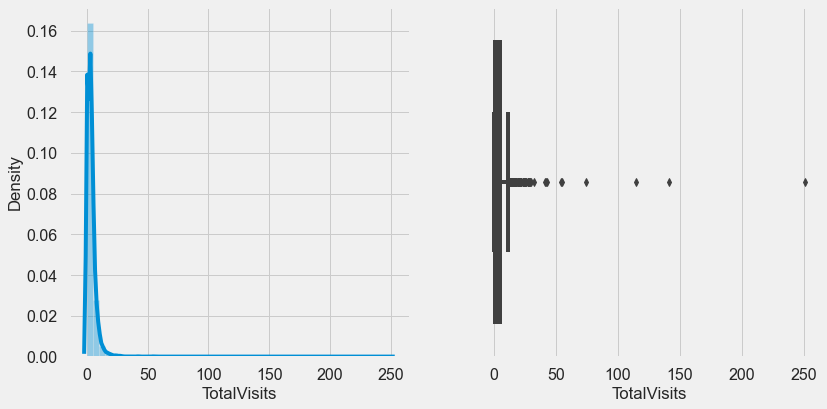

In [40]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['TotalVisits'])
plt.subplot(1,2,2)
sns.boxplot(lead['TotalVisits'])
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          As we see there are some outliers in the data, we will impute with median and not mean value. 
    </span>    
</div>

In [41]:
lead['TotalVisits'].fillna(lead['TotalVisits'].median(), inplace=True)
lead['TotalVisits'].isnull().sum()

0

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.2  Page Views Per Visit
            </span>   
        </font>    
</h3>

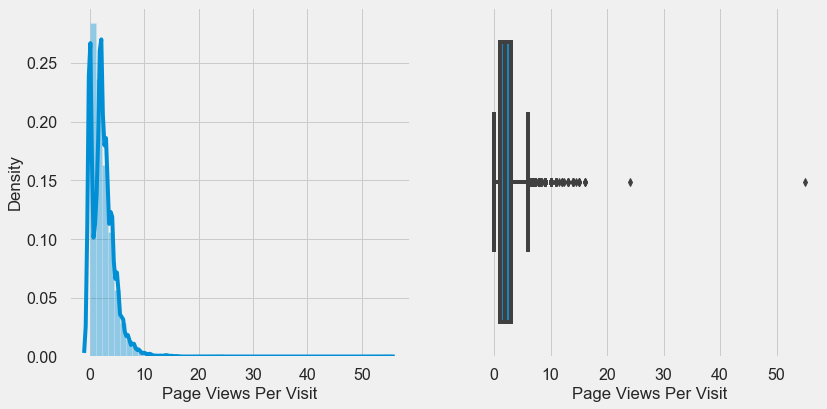

In [42]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          As we see there are some outliers in the data, we will impute with median and not mean value. 
    </span>    
</div> 

In [43]:
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(), inplace=True)
lead['Page Views Per Visit'].isnull().sum()

0

<a id="eda"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            5. Exploratory Data Analysis
            </span>   
        </font>    
</h1>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

<a id="imbalance"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.1 Data Imbalance
            </span>   
        </font>    
</h2>

In [44]:
lead['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          There are more number of unsuccessful leads than successful leads.  
    </span>    
</div> 

<a id="graphfunc"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.2 Graph Functions
            </span>   
        </font>    
</h2>

In [45]:
# function for plotting repetitive countplots in univariate categorical analysis on the lead dataset
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t Converted; 
# 2. Percentage of converted leads within column

def univariate_categorical(feature,label_rotation=False,horizontal_layout=True):
    temp_count = lead[feature].value_counts()
    temp_perc = lead[feature].value_counts(normalize = True)
    df1 = pd.DataFrame({feature: temp_count.index,'Total Leads': temp_count.values,'% Values': temp_perc.values * 100})
    print(df1)
    
    # Calculate the percentage of Converted=1 per category value
    cat_perc = lead[[feature, 'Converted']].groupby([feature],as_index=False).mean()
    cat_perc["Converted"] = cat_perc["Converted"]*100
    cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))   
    # 1. Subplot 1: Count plot of categorical column
    sns.set_palette("twilight")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=lead,
                    hue ="Converted",
                    order=cat_perc[feature],
                    palette=['r','g'])

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    ax1.legend(['Not Converted','Converted'])
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='Converted', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Converted leads [%]', fontsize=15)
    plt.xlabel(feature,fontsize=15) 
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + "( Converted % )", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          Most of the features in the dataset are categorical. Let us begin our analysis by performing segmented univariate analysis on each categorical feature. We will view bar plots that will show the total count of converted and non-converted leads in every category. 
    </span>    
</div>

In [46]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

In [47]:
# Renaming some of the column headers which has long header

lead.rename(columns={'What is your current occupation': 'Occupation', 
                     'Through Recommendations': 'Recommendation',
                     'A free copy of Mastering The Interview': 'Free Copy'                   
                    },inplace = True)
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendation', 'Free Copy'],
      dtype='object')

<a id="univar"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.3 Univariate Analysis - Categorical
            </span>   
        </font>    
</h2>

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            5.3.1 Lead Origin
            </span>   
        </font>    
</h3>

               Lead Origin  Total Leads   % Values
0  Landing Page Submission         4886  52.878788
1                      API         3580  38.744589
2            Lead Add Form          718   7.770563
3              Lead Import           55   0.595238
4           Quick Add Form            1   0.010823


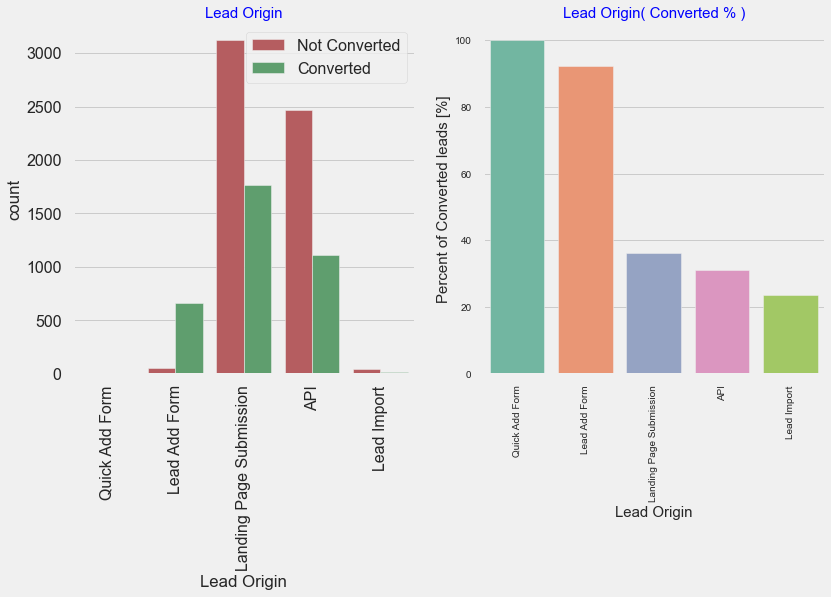

In [48]:
#Run the function to get plot categorical plots 
univariate_categorical("Lead Origin",label_rotation=True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          <ul>
              <li>Most Leads originated from submissions on the landing page and around 38% of those are converted followed by API, where around 30% are converted.</li>
              <li>Even though Lead Origins from Quick Add Form are 100% Converted, there was just 1 lead from that category. Leads from the Lead Add Form are the next highest conversions in this category at around 90% of 718 leads.</li>
              <li> Lead Import are very less in count and conversion rate is also the lowest 
        </ul>
        <b> To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.</b>
    </span>    
</div>

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            5.3.2 Lead Source
            </span>   
        </font>    
</h3>

          Lead Source  Total Leads   % Values
0              Google         2909  31.482684
1      Direct Traffic         2543  27.521645
2          Olark Chat         1755  18.993506
3      Organic Search         1154  12.489177
4           Reference          534   5.779221
5    Welingak Website          142   1.536797
6      Referral Sites          125   1.352814
7            Facebook           55   0.595238
8                bing            6   0.064935
9          Click2call            4   0.043290
10       Social Media            2   0.021645
11      Press_Release            2   0.021645
12          Live Chat            2   0.021645
13     youtubechannel            1   0.010823
14             NC_EDM            1   0.010823
15  Pay per Click Ads            1   0.010823
16            WeLearn            1   0.010823
17   welearnblog_Home            1   0.010823
18            testone            1   0.010823
19               blog            1   0.010823


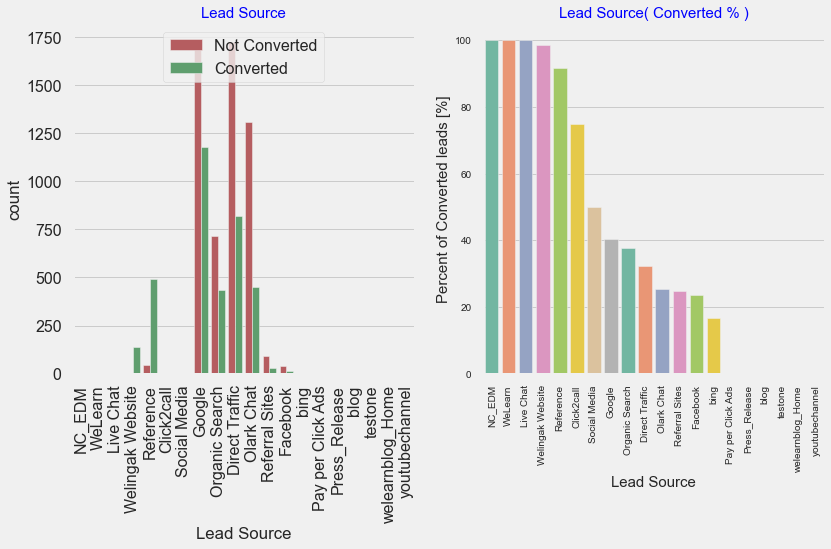

In [49]:
#Run the function to get plot categorical plots
univariate_categorical("Lead Source",label_rotation=True)

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
          We will combine smaller lead sources as 'Other Sources'. 
    </span>    
</div>

In [50]:
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Sources')

        Lead Source  Total Leads   % Values
0            Google         2909  31.482684
1    Direct Traffic         2543  27.521645
2        Olark Chat         1755  18.993506
3    Organic Search         1154  12.489177
4         Reference          534   5.779221
5  Welingak Website          142   1.536797
6    Referral Sites          125   1.352814
7          Facebook           55   0.595238
8     Other Sources           23   0.248918


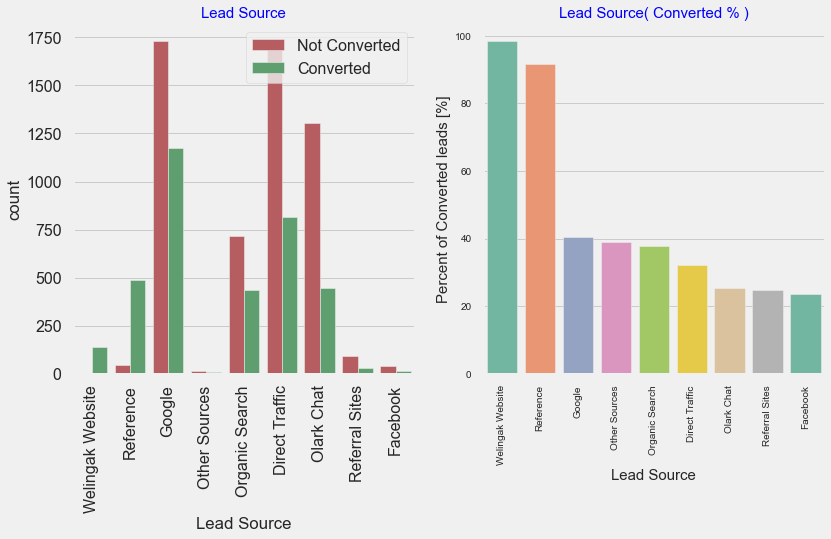

In [51]:
#Running the function again to check the updated statistics
univariate_categorical("Lead Source",label_rotation=True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          <ul>
              <li>The source of most leads was Google, and 40% of the leads converted, followed by Direct Traffic,Organic search and Olark chat where around 35%, 38% and 30% converted respectively.</li>
              <li>A lead that came from a reference has over 90% conversion from the total of 534. </li>
              <li> Welingak Website has almost 100% lead conversion rate. This option should be explored more to increase lead conversion</li>
        </ul>
        <b> To increase lead count, initiatives should be taken so already exitsing members increase their referrals. </b>
    </span>    
</div>

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            5.3.3 Do not Email
            </span>   
        </font>    
</h3>

  Do Not Email  Total Leads   % Values
0           No         8506  92.056277
1          Yes          734   7.943723


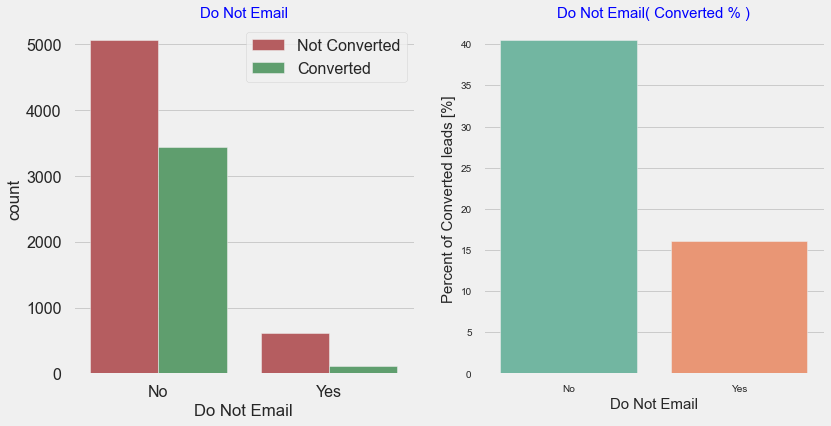

In [52]:
#Run the function to get plot categorical plots
univariate_categorical("Do Not Email")

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          <ul>
              <li> Majority of the people are ok with receiving email (~92%) </li>
              <li> People who are ok with email has conversion rate of 40%</li>
              <li> People who have opted out of receive email has lower rate of conversion (only 15%) </li>
        </ul>
    </span>    
</div>

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            5.3.4 Last Activity
            </span>   
        </font>    
</h3>

                   Last Activity  Total Leads   % Values
0                   Email Opened         3540  38.311688
1                       SMS Sent         2745  29.707792
2        Olark Chat Conversation          973  10.530303
3        Page Visited on Website          640   6.926407
4              Converted to Lead          428   4.632035
5                  Email Bounced          326   3.528139
6             Email Link Clicked          267   2.889610
7      Form Submitted on Website          116   1.255411
8                    Unreachable           93   1.006494
9                   Unsubscribed           61   0.660173
10      Had a Phone Conversation           30   0.324675
11            Approached upfront            9   0.097403
12  View in browser link Clicked            6   0.064935
13                Email Received            2   0.021645
14             Email Marked Spam            2   0.021645
15    Visited Booth in Tradeshow            1   0.010823
16        Resubscribed to email

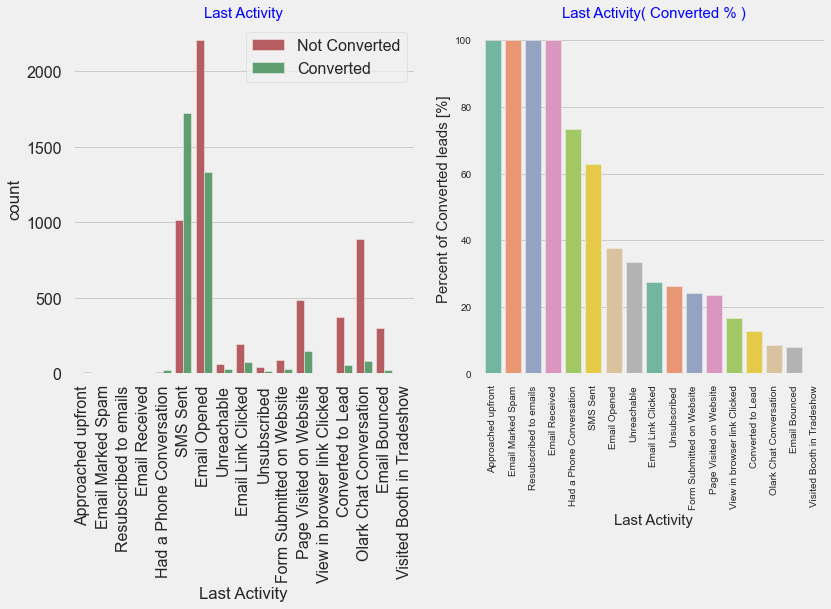

In [53]:
#Run the function to get plot categorical plots
univariate_categorical("Last Activity",label_rotation=True)

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
          We will combine smaller Last Activity values as 'Other Activity'. 
    </span>    
</div>

In [54]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

                Last Activity  Total Leads   % Values
0                Email Opened         3540  38.311688
1                    SMS Sent         2745  29.707792
2     Olark Chat Conversation          973  10.530303
3     Page Visited on Website          640   6.926407
4           Converted to Lead          428   4.632035
5               Email Bounced          326   3.528139
6          Email Link Clicked          267   2.889610
7   Form Submitted on Website          116   1.255411
8                 Unreachable           93   1.006494
9                Unsubscribed           61   0.660173
10             Other Activity           51   0.551948


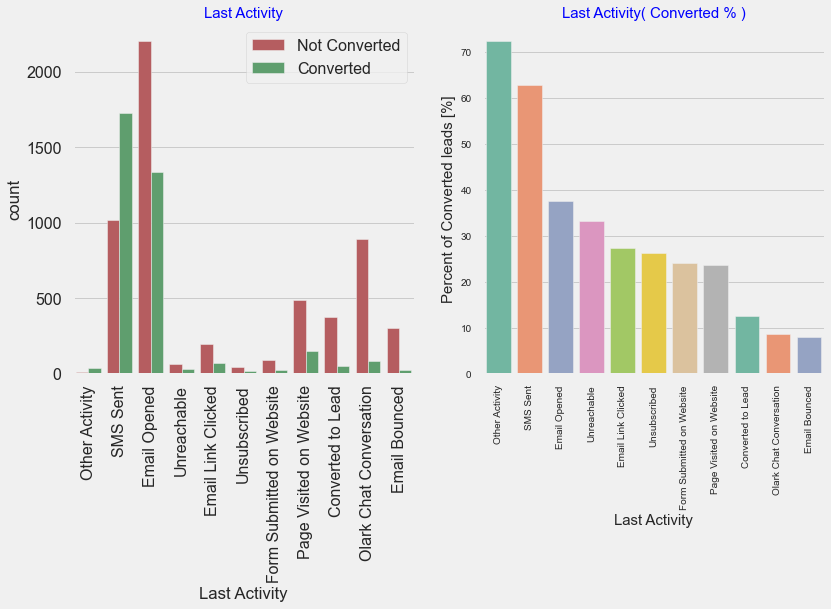

In [55]:
#Run the function to get plot categorical plots
univariate_categorical("Last Activity",label_rotation=True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          <ul>
              <li>Most of the lead have their Email opened as their last activity</li>
              <li> After combining smaller Last Activity types as Other Activity, the lead conversion is very high (~70%) </li>
              <li>Conversion rate for leads with last activity as SMS Sent is almost 60%</li>
        </ul>
    </span>    
</div>

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            5.3.5 Specialization
            </span>   
        </font>    
</h3>

                       Specialization  Total Leads   % Values
0                             Unknown         3380  36.580087
1                  Finance Management          976  10.562771
2           Human Resource Management          848   9.177489
3                Marketing Management          838   9.069264
4               Operations Management          503   5.443723
5             Business Administration          403   4.361472
6              IT Projects Management          366   3.961039
7             Supply Chain Management          349   3.777056
8   Banking, Investment And Insurance          338   3.658009
9                  Travel and Tourism          203   2.196970
10              Media and Advertising          203   2.196970
11             International Business          178   1.926407
12              Healthcare Management          159   1.720779
13             Hospitality Management          114   1.233766
14                         E-COMMERCE          112   1.212121
15      

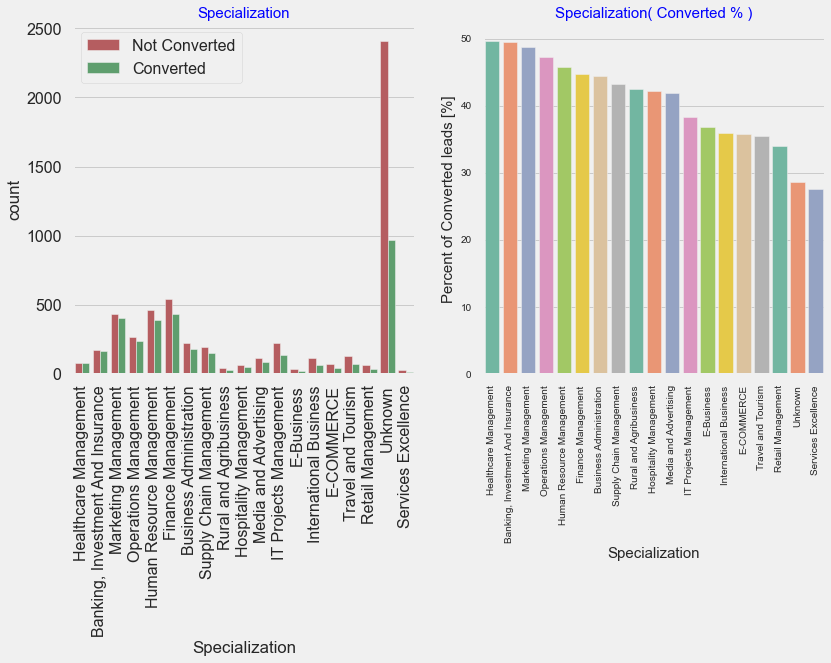

In [56]:
#Run the function to get plot categorical plots
univariate_categorical("Specialization",label_rotation=True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          <ul>
              <li>Most of the leads have not mentioned a specialization and around 28% of those converted</li>
              <li>Leads with Finance management and Marketing Management - Over 45% Converted </li>
        </ul>
    </span>    
</div>

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            5.3.6 Occupation
            </span>   
        </font>    
</h3>

             Occupation  Total Leads   % Values
0            Unemployed         5600  60.606061
1               Unknown         2690  29.112554
2  Working Professional          706   7.640693
3               Student          210   2.272727
4                 Other           16   0.173160
5             Housewife           10   0.108225
6           Businessman            8   0.086580


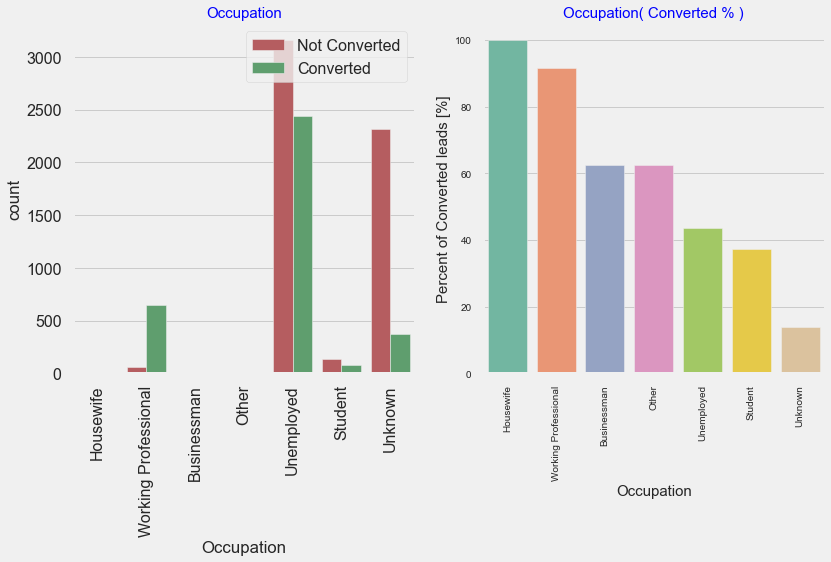

In [57]:
#Run the function to get plot categorical plots
univariate_categorical("Occupation",label_rotation=True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          <ul>
              <li>Though Housewives are less in numbers, they have 100% conversion rate </li>
              <li> Working professionals, Businessmen and Other category have high conversion rate </li>
              <li> Though Unemployed people have been contacted in the highest number, the conversion rate is low (~40%)</li>
        </ul>
        <b> We cannot combine smalled value categories as their conversion rate is very different. Combing them may provide wrong predictions. </b>
    </span>    
</div>

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            5.3.7 Search, Newspaper, Newspaper Article, Digital Advertisement, ,X Education Forums, Free Copy
            </span>   
        </font>    
</h3>

<span style='font-family:Georgia'>
    The following features have two categories only. We are going to evaluate the skewness of the data and decide whether to exclude them from model building. 
</span>    

In [58]:
def pieplot(col):
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    converted = lead[col].value_counts().rename_axis('unique_values').to_frame('counts')
    plt.pie(converted.counts, labels = ["No","Yes"],colors = ['red','green'],autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(col)

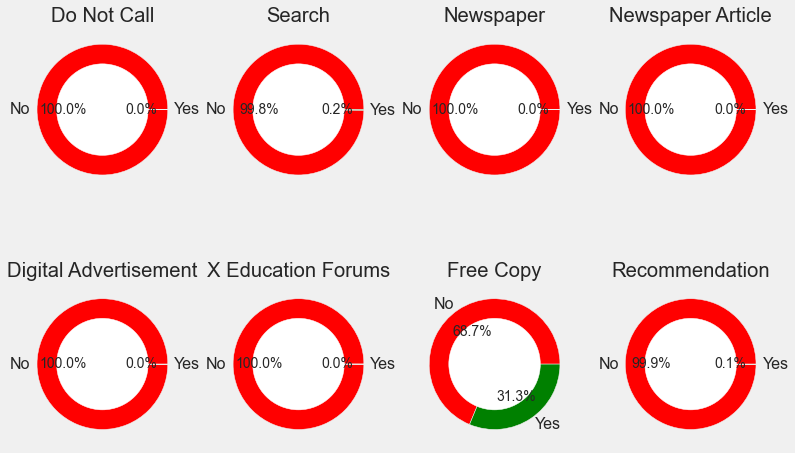

In [59]:
# Lets lookinto the data distribution of the following columns
col = ['Do Not Call','Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums', 'Free Copy','Recommendation']
plt.figure(figsize = (12,8))
i=1
for each_col in col:
    plt.subplot(2,4,i)
    pieplot(each_col)
    i+=1

  Free Copy  Total Leads   % Values
0        No         6352  68.744589
1       Yes         2888  31.255411


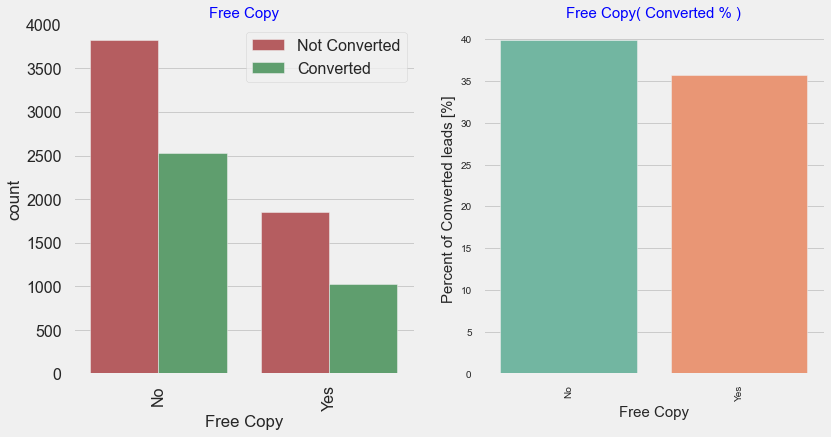

In [60]:
#Run the function to get plot categorical plots
univariate_categorical("Free Copy",label_rotation=True)

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
          Search, Newspaper, Newspaper Article, Digital Advertisement, ,X Education Forums, Recommendation data are very skewed and can be deleted as they will not add any value to the model. <br>
        Distributing Free-Copy of Mastering Interview doesn't seem to add much value as the coenversion rate is almost same. We will drop all these columns.
    </span>    
</div>

In [61]:
lead.drop(col,axis = 1, inplace = True)
len(lead.columns)

10

<a id="uninumvar"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.4 Univariate Analysis - Numerical
            </span>   
        </font>    
</h2>

In [62]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation'],
      dtype='object')

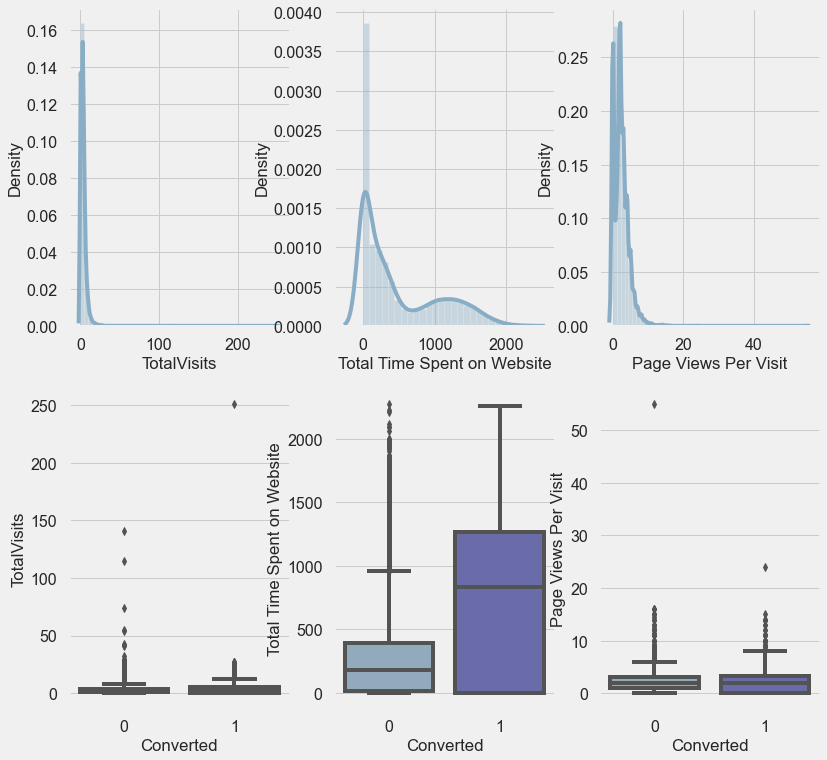

In [63]:
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(12,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.distplot(lead[col])
    plt.subplot(2,3,3+i)
    sns.boxplot(y=lead[col], x = lead['Converted'])
    i+=1

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          TotalVisits and Page Views per Visit has some outliers which needs to be treated. 
    </span>    
</div>

<a id="bivar"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.5 Bivariate Analysis
            </span>   
        </font>    
</h2>

<Figure size 1440x1440 with 0 Axes>

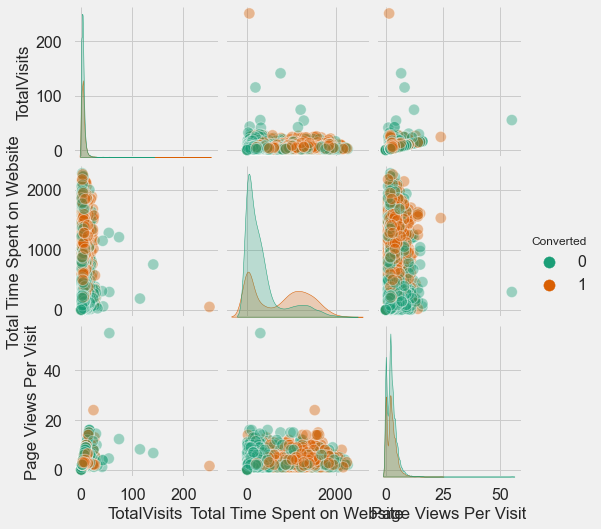

In [64]:
plt.figure(figsize =(20,20))
sns.pairplot(lead[num_cols],hue="Converted",kind='scatter', plot_kws={'alpha':0.4},palette = 'Dark2')                                  
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          Data is not normally distributed.  
    </span>    
</div>

<a id="dataprep"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            6. Data Preparation
            </span>   
        </font>    
</h1>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

<a id="outlier"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
           6.1 Outliers Treatment
            </span>   
        </font>    
</h2>

In [65]:
#Checking the detailed percentile values
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.438636                   487.698268   
std       0.486714     4.819024                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
90%       1.000000     7.000000                  1380.000000   
95%       1.000000    10.000000                  1562.000000   
99%       1.000000    17.000000                  1840.610000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.357440  
std                2.145781  
min                0.000000  
10%                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               55.000000

In [66]:
num_cols

array(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'], dtype=object)

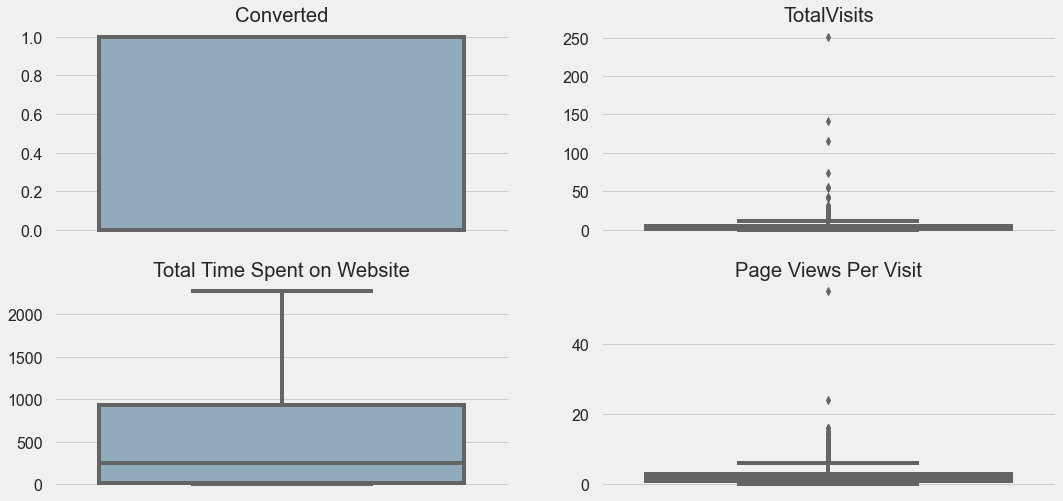

In [67]:
#Plotting the numerical columns for outlier values
i=1
plt.figure(figsize=[16,8])
for col in num_cols:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          Though outliers in TotalVisits and Page Views Per Visit shows valid values, this will misclassify the outcomes and consequently create problems when making inferences with the wrong model. Logistic Regression is heavily influenced by outliers. So lets cap the TotalVisits and Page Views Per Visit to their 95 th percentile due to following reasons: 
    </span>
    <br>
    <span style='font-family:Georgia'>
        <ul>
            <li> Data set is fairly high number </li>
            <li> 95th percentile and 99th percentile of these columns are very close and hence impact of capping to 95th or 99th percentile will be the same </li>
        </ul>
    </span>
</div>

In [68]:
#Capping the data at 95% percetile value
Q4 = lead['TotalVisits'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for TotalVisits column : ",len(lead[lead['TotalVisits'] >= Q4]))
lead.loc[lead['TotalVisits'] >= Q4, 'TotalVisits'] = Q4 # outlier capping

Q4 = lead['Page Views Per Visit'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for Page Views Per Visit column : ",len(lead[lead['Page Views Per Visit'] >= Q4]))
lead.loc[lead['Page Views Per Visit'] >= Q4, 'Page Views Per Visit'] = Q4 # outlier capping

Total number of rows getting capped for TotalVisits column :  467
Total number of rows getting capped for Page Views Per Visit column :  604


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          The number of rows getting capped are quite high. This is also the reason that we are capping the data instead of deleting it.  
    </span>
</div>

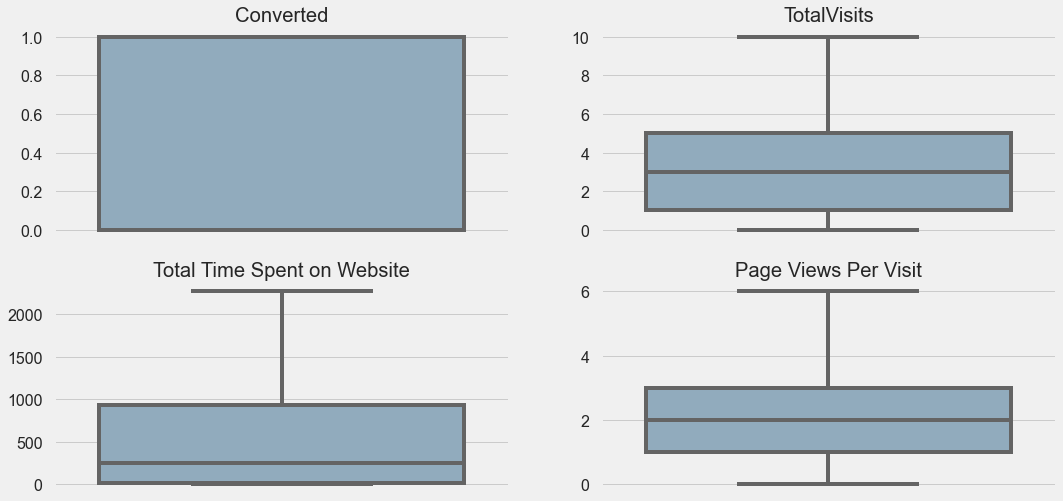

In [69]:
#replotting the graphs to check for outlier treatment
i=1
plt.figure(figsize=[16,8])
for col in num_cols:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

In [70]:
# Checking the percentile values again 
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.179221                   487.698268   
std       0.486714     2.761219                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
90%       1.000000     7.000000                  1380.000000   
95%       1.000000    10.000000                  1562.000000   
99%       1.000000    10.000000                  1840.610000   
max       1.000000    10.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.255105  
std                1.779471  
min                0.000000  
10%                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                6.000000  
max                6.000000

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          Now that we have capped the outliers, let's proceed to data preparation for model building.  
    </span>
</div>

<a id="fconvert"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
           6.2 Convert Binary Categories
            </span>   
        </font>    
</h2>

In [71]:
# Checking the unique value counts for categorcial columns
lead.nunique().sort_values()

Do Not Email                      2
Converted                         2
Lead Origin                       5
Occupation                        7
Lead Source                       9
TotalVisits                      11
Last Activity                    11
Specialization                   19
Page Views Per Visit             91
Total Time Spent on Website    1731
dtype: int64

In [72]:
# Checking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [73]:


# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead YES/NO variable list
lead['Do Not Email'] = lead[['Do Not Email']].apply(binary_map)

In [74]:
# rechecking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

<a id="dummy"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
           6.3 Dummy Variables
            </span>   
        </font>    
</h2>

In [75]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

lead.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  Occupation  \
0  Page Visited on Website                  Unknown  Unemployed   
1             Email Opened                  Unknown  Unemployed   
2             Email Opened  Business Administration     Student   
3              Unreachable    Media and Advertising  Unemployed   
4        Converted to Lead                  Unknown  Unemployed   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Other Sources  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Occupation_Housewife  Occupation_Other  Occupation_Student  \
0                     0                 0                   0   
1                     0                 0                   0   
2                     0                 0                   1   
3                     0                 0                   0   
4                     0                 0                   0   

   Occupation_Unemployed  Occupation_Unknown  Occupation_Working Professional  \
0                      1                   0                                0   
1                      1                   0                                0   
2                      0                   0                       

In [76]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization'], axis=1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Facebook                      9240 non-null   uint8  
 10  Lead Source_Google                  

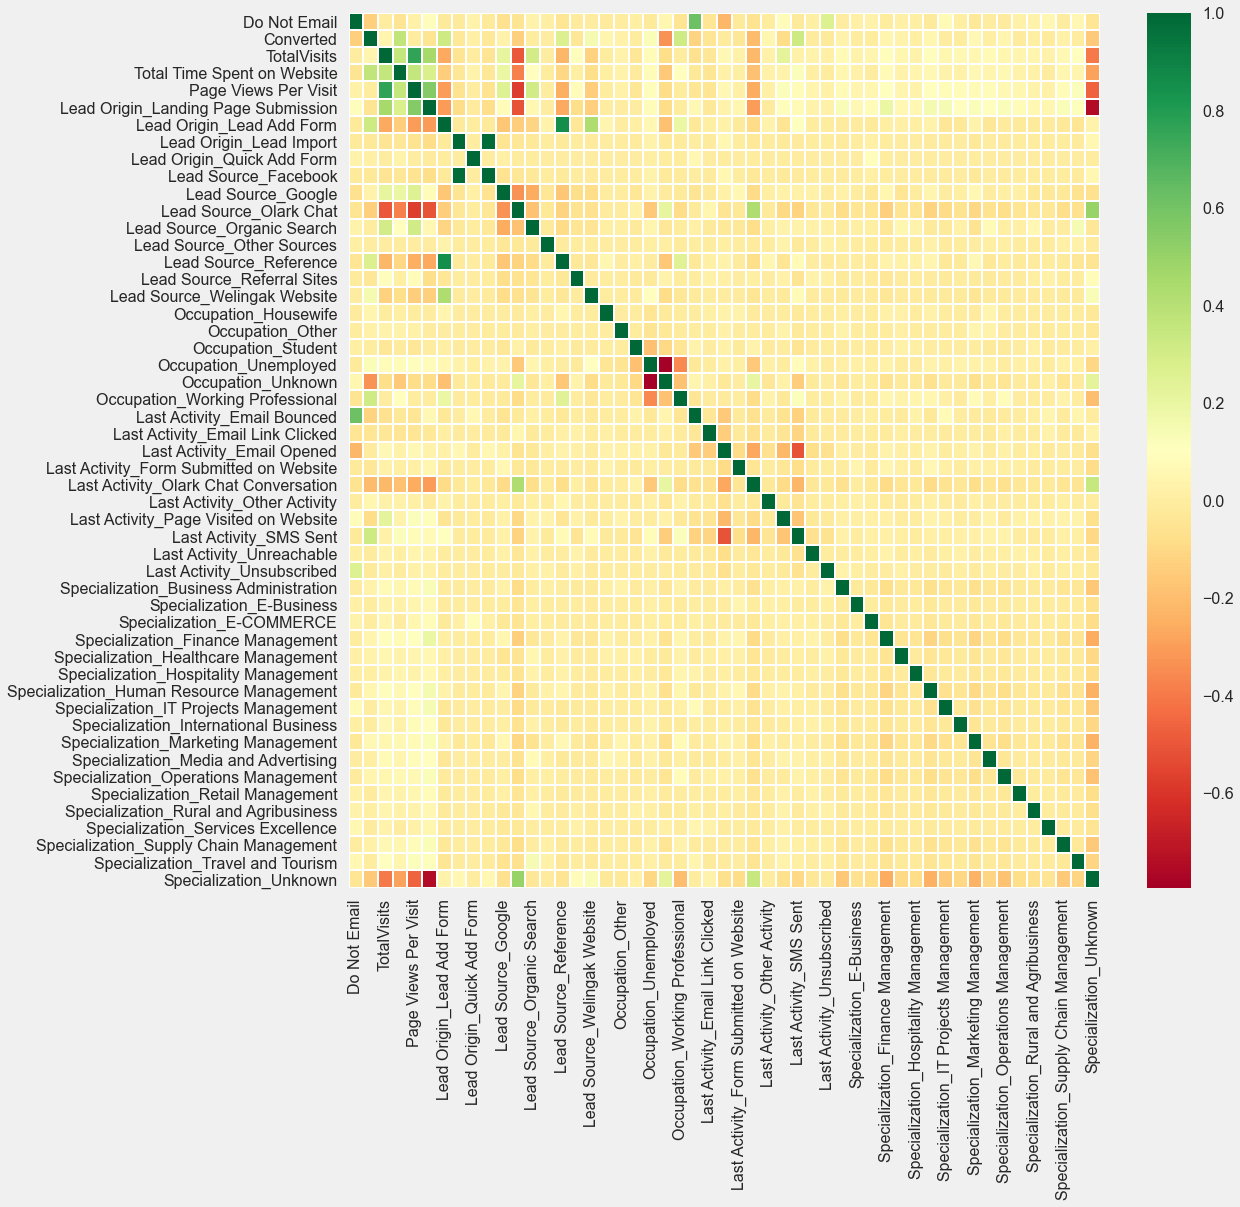

In [77]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(lead.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [78]:
print('Total number of columns after Encoding : ',len(lead.columns))

Total number of columns after Encoding :  51


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          There are 51 columns in Heatmap which makes it difficult to interpret. Let's review top 5 positively and negatively correlated features.
    </span>    
</div>

In [79]:
corr_lead = lead.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

VAR1                       VAR2  \
466                  Lead Source_Facebook    Lead Origin_Lead Import   
720                 Lead Source_Reference  Lead Origin_Lead Add Form   
206                  Page Views Per Visit                TotalVisits   
1173          Last Activity_Email Bounced               Do Not Email   
259   Lead Origin_Landing Page Submission       Page Views Per Visit   

      Correlation  
466      0.981709  
720      0.853237  
206      0.767585  
1173     0.618470  
259      0.553423

In [80]:
corr_df.sort_values(by='Correlation', ascending=True, inplace=True)

# Top 5 Negatively correlated variables
corr_df.head(5)

VAR1                                 VAR2  Correlation
1091      Occupation_Unknown                Occupation_Unemployed    -0.794875
2555  Specialization_Unknown  Lead Origin_Landing Page Submission    -0.748263
565   Lead Source_Olark Chat                 Page Views Per Visit    -0.573334
566   Lead Source_Olark Chat  Lead Origin_Landing Page Submission    -0.512950
1555  Last Activity_SMS Sent           Last Activity_Email Opened    -0.512325

<a id="split"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
           6.4 Train - Test Split
            </span>   
        </font>    
</h2>

In [81]:
# target variable
Y = lead['Converted']
X = lead.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [82]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (6468, 50)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 50)
 Shape of y_test is  :  (2772,)


<a id="scaling"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
           6.5 Feature Scaling
            </span>   
        </font>    
</h2>

In [83]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0    -1.149699                    -0.885371   
6795             0     0.299722                     0.005716   
3516             0     0.662077                    -0.691418   
8105             0     0.662077                     1.365219   
3934             0    -1.149699                    -0.885371   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
1871             -1.266675                                    0   
6795             -0.516439                                    1   
3516              0.143543                                    0   
8105              1.553761                                    1   
3934             -1.266675                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
1871                           0                     0                   0   
6795                           0                     0                   0   
3516                           0                     0                   0   
8105                           0                     0                   1   
3934                           0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
1871                       1                           0   
6795                       0                           0   
3516                       1                           0   
8105                       0                           0   
3934                       1                           0   

      Lead Source_Other Sources  Lead Source_Reference  \
1871                          0                      0   
6795                          0                      0   
3516                          0                      0   
8105                          0                      0   
3934                          0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
1871                           0                             0   
6795                           0                             0   
3516                           0                             0   
8105                           0                             0   
3934                           0                             0   

      Occupation_Housewife  Occupation_Other  Occupation_Student  \
1871                     0                 0                   0   
6795                     0                 0                   0   
3516                     0                 0                   0   
8105                     0                 0                   0   
3934                     0                 0                   0   

      Occupation_Unemployed  Occupation_Unknown  \
1871                      1                   0   
6795                      1                   0   
3516                      1                   0   
8105                      1                   0   
3934                      1                   0   

      Occupation_Working Professional  Last Activity_Email Bounced  \
1871                                0                            0   
6795                                0                            0   
3516                                0                            0   
8105                                0                            0   
3934                                0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1871                                 0                           1   
6795

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
          Now that we have our Train and Test data bases ready and Train database standardized, let's try building some model using Logistic Regression.
    </span>
</div>

<a id="modelbuild"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            7. Model Building
            </span>   
        </font>    
</h1>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

<a id="RFE"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
           7.1 RFE for Feature Reduction
            </span>   
        </font>    
</h2>

In [84]:
# Using RFE to reduce the feature count from 54 to 20
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select= 20)           
rfe = rfe.fit(X_train, y_train) 

In [85]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Other Sources', False, 3),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', False, 7),
 ('Occupation_Student', False, 9),
 ('Occupation_Unemployed', False, 8),
 ('Occupation_Unknown', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', True, 1),
 ('La

In [86]:
#checking which columns remained after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Occupation_Housewife',
       'Occupation_Unknown', 'Occupation_Working Professional',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Specialization_Unknown'],
      dtype='object')

In [87]:
#Columns which have been removed after RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other Sources',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'S

In [88]:
# Functions to repeat Logictis regression model and VIF calculation repeatedly

# function to build logistic regression model
def build_logistic_model(feature_list):
    X_train_local = X_train[feature_list] # get feature list for VIF
    X_train_sm = sm.add_constant(X_train_local) # required by statsmodels   
    log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit() # build model and learn coefficients  
    return(log_model, X_train_sm) # return the model and the X_train fitted with constant 

#function to calculate VIF
def calculate_VIF(X_train):  # Calculate VIF for features
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) # returns the calculated VIFs for all the features

<a id="manual"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
           7.2 Manual Feature Reduction
            </span>   
        </font>    
</h2>

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
           7.2.1 Model 1
            </span>   
        </font>    
</h3>

In [89]:
features = list(rfe_col) #  Use RFE selected variables
log_model1, X_train_sm1 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.5
Date:                Sun, 12 Jun 2022   Deviance:                       5200.9
Time:                        21:29:08   Pearson chi2:                 8.03e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7869      0.150     -5.233      0.000      -1.082      -0.492
Do Not Email                             -1.1731      0.182     -6.435      0.000      -1.530      -0.816
Total Time Spent on Website               1.0654      0.040     26.623      0.000       0.987       1.144
Lead Origin_Landing Page Submission      -1.0426      0.129     -8.058      0.000      -1.296      -0.789
Lead Origin_Lead Add Form                 2.7686      0.204     13.566      0.000       2.369       3.169
Lead Source_Facebook                     -0.6626      0.523     -1.267      0.205      -1.687       0.362
Lead Source_Olark Chat                    1.0824      0.124      8.742      0.000       0.840       1.325
Lead Source_Welingak Website              2.4808      0.750      3.309      0.001       1.011       3.950
Occupation_Housewife                     22.7618   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
Occupation_Unknown                       -1.0783      0.088    -12.306      0.000      -1.250      -0.907
Occupation_Working Professional           2.4080      0.190     12.683      0.000       2.036       2.780
Last Activity_Email Opened                0.7348      0.110      6.660      0.000       0.519       0.951
Last Activity_Olark Chat Conversation    -0.6021      0.192     -3.141      0.002      -0.978      -0.226
Last Activity_Other Activity              2.2497      0.488      4.608      0.000       1.293       3.207
Last Activity_SMS Sent                    1.8816      0.112     16.847      0.000       1.663       2.100
Last Activity_Unreachable                 0.8678      0.368      2.361      0.018       0.147       1.588
Last Activity_Unsubscribed                1.3689      0.484      2.829      0.005       0.421       2.317
Specialization_Hospitality Management    -0.9777      0.328     -2.978      0.003      -1.621      -0.334
Specialization_Retail Management         -0.4160      0.337     -1.236      0.217      -1.076       0.244
Specialization_Rural and Agribusiness     0.5288      0.390      1.357      0.175      -0.235       1.293
Specialization_Unknown                   -0.9752      0.124     -7.870      0.000      -1.218      -0.732
=========================================================================================================
"""

In [90]:
#Checking VIF values
calculate_VIF(X_train)

Features    VIF
19                     Occupation_Unemployed  38.68
20                        Occupation_Unknown  19.85
5                  Lead Origin_Lead Add Form  17.14
6                    Lead Origin_Lead Import  16.90
8                       Lead Source_Facebook  16.86
49                    Specialization_Unknown  14.44
13                     Lead Source_Reference  14.08
24                Last Activity_Email Opened  10.05
4        Lead Origin_Landing Page Submission   8.48
29                    Last Activity_SMS Sent   8.16
21           Occupation_Working Professional   5.78
10                    Lead Source_Olark Chat   4.07
15              Lead Source_Welingak Website   4.01
35         Specialization_Finance Management   3.96
26     Last Activity_Olark Chat Conversation   3.78
41       Specialization_Marketing Management   3.61
38  Specialization_Human Resource Management   3.57
3                       Page Views Per Visit   3.32
28     Last Activity_Page Visited on Website   2.87
1                                TotalVisits   2.74
22               Last Activity_Email Bounced   2.72
9                         Lead Source_Google   2.69
43      Specialization_Operations Management   2.61
18                        Occupation_Student   2.32
32    Specialization_Business Administration   2.22
0                               Do Not Email   2.17
39     Specialization_IT Projects Management   2.05
47    Specialization_Supply Chain Management   2.05
11                Lead Source_Organic Search   1.80
23          Last Activity_Email Link Clicked   1.68
48         Specialization_Travel and Tourism   1.63
42      Specialization_Media and Advertising   1.59
40     Specialization_International Business   1.53
36      Specialization_Healthcare Management   1.44
37     Specialization_Hospitality Management   1.38
34                 Specialization_E-COMMERCE   1.38
44          Specialization_Retail Management   1.31
25   Last Activity_Form Submitted on Website   1.31
2                Total Time Spent on Website   1.30
31                Last Activity_Unsubscribed   1.29
45     Specialization_Rural and Agribusiness   1.21
30                 Last Activity_Unreachable   1.21
33                 Specialization_E-Business   1.17
27              Last Activity_Other Activity   1.16
14                Lead Source_Referral Sites   1.15
46        Specialization_Services Excellence   1.14
16                      Occupation_Housewife   1.11
17                          Occupation_Other   1.08
12                 Lead Source_Other Sources   1.06
7                 Lead Origin_Quick Add Form   1.02

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
           7.2.2 Model 2
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
        We will remove <b>'Occupation_Housewife'</b> feature due to high P-value of 0.999
    </span>   
</div>

In [91]:
features.remove('Occupation_Housewife') # Remove 'Occupation_Housewife number' from RFE features list
log_model2, X_train_sm2 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.0
Date:                Sun, 12 Jun 2022   Deviance:                       5214.0
Time:                        21:29:09   Pearson chi2:                 8.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7773      0.150     -5.180      0.000      -1.071      -0.483
Do Not Email                             -1.1788      0.182     -6.468      0.000      -1.536      -0.822
Total Time Spent on Website               1.0644      0.040     26.627      0.000       0.986       1.143
Lead Origin_Landing Page Submission      -1.0381      0.129     -8.029      0.000      -1.292      -0.785
Lead Origin_Lead Add Form                 2.7849      0.204     13.661      0.000       2.385       3.184
Lead Source_Facebook                     -0.6639      0.523     -1.270      0.204      -1.688       0.360
Lead Source_Olark Chat                    1.0818      0.124      8.740      0.000       0.839       1.324
Lead Source_Welingak Website              2.4637      0.750      3.286      0.001       0.994       3.933
Occupation_Unknown                       -1.0822      0.088    -12.359      0.000      -1.254      -0.911
Occupation_Working Professional           2.3994      0.190     12.643      0.000       2.027       2.771
Last Activity_Email Opened                0.7327      0.110      6.663      0.000       0.517       0.948
Last Activity_Olark Chat Conversation    -0.6074      0.192     -3.171      0.002      -0.983      -0.232
Last Activity_Other Activity              2.2402      0.488      4.588      0.000       1.283       3.197
Last Activity_SMS Sent                    1.8716      0.111     16.805      0.000       1.653       2.090
Last Activity_Unreachable                 0.8567      0.368      2.331      0.020       0.136       1.577
Last Activity_Unsubscribed                1.3645      0.484      2.820      0.005       0.416       2.313
Specialization_Hospitality Management    -0.9849      0.328     -3.000      0.003      -1.628      -0.341
Specialization_Retail Management         -0.4224      0.336     -1.256      0.209      -1.082       0.237
Specialization_Rural and Agribusiness     0.5204      0.390      1.336      0.182      -0.243       1.284
Specialization_Unknown                   -0.9793      0.124     -7.907      0.000      -1.222      -0.737
=========================================================================================================
"""

In [92]:
#Checking VIF Values
calculate_VIF(X_train[features])

Features   VIF
2     Lead Origin_Landing Page Submission  3.00
18                 Specialization_Unknown  2.78
9              Last Activity_Email Opened  2.57
12                 Last Activity_SMS Sent  2.29
5                  Lead Source_Olark Chat  2.20
10  Last Activity_Olark Chat Conversation  1.77
3               Lead Origin_Lead Add Form  1.64
7                      Occupation_Unknown  1.61
6            Lead Source_Welingak Website  1.27
0                            Do Not Email  1.27
1             Total Time Spent on Website  1.26
8         Occupation_Working Professional  1.21
14             Last Activity_Unsubscribed  1.08
4                    Lead Source_Facebook  1.03
11           Last Activity_Other Activity  1.03
13              Last Activity_Unreachable  1.03
15  Specialization_Hospitality Management  1.02
16       Specialization_Retail Management  1.02
17  Specialization_Rural and Agribusiness  1.01

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
           7.2.3 Model 3
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
        We will remove <b>'Specialization_Retail Management'</b> feature due to high P-value of 0.209
    </span>   
</div>

In [93]:
features.remove('Specialization_Retail Management')
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.8
Date:                Sun, 12 Jun 2022   Deviance:                       5215.6
Time:                        21:29:10   Pearson chi2:                 8.10e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7834      0.150     -5.222      0.000      -1.077      -0.489
Do Not Email                             -1.1828      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website               1.0628      0.040     26.621      0.000       0.985       1.141
Lead Origin_Landing Page Submission      -1.0411      0.129     -8.050      0.000      -1.295      -0.788
Lead Origin_Lead Add Form                 2.7834      0.204     13.653      0.000       2.384       3.183
Lead Source_Facebook                     -0.6640      0.522     -1.271      0.204      -1.688       0.360
Lead Source_Olark Chat                    1.0789      0.124      8.719      0.000       0.836       1.321
Lead Source_Welingak Website              2.4644      0.750      3.287      0.001       0.995       3.934
Occupation_Unknown                       -1.0816      0.088    -12.353      0.000      -1.253      -0.910
Occupation_Working Professional           2.3991      0.190     12.636      0.000       2.027       2.771
Last Activity_Email Opened                0.7357      0.110      6.692      0.000       0.520       0.951
Last Activity_Olark Chat Conversation    -0.6033      0.192     -3.150      0.002      -0.979      -0.228
Last Activity_Other Activity              2.2470      0.488      4.604      0.000       1.290       3.204
Last Activity_SMS Sent                    1.8734      0.111     16.819      0.000       1.655       2.092
Last Activity_Unreachable                 0.8548      0.368      2.320      0.020       0.133       1.577
Last Activity_Unsubscribed                1.3745      0.484      2.841      0.004       0.426       2.323
Specialization_Hospitality Management    -0.9772      0.328     -2.977      0.003      -1.621      -0.334
Specialization_Rural and Agribusiness     0.5275      0.389      1.354      0.176      -0.236       1.291
Specialization_Unknown                   -0.9745      0.124     -7.869      0.000      -1.217      -0.732
=========================================================================================================
"""

In [94]:
#Checking VIF Values
calculate_VIF(X_train[features])

Features   VIF
2     Lead Origin_Landing Page Submission  2.99
17                 Specialization_Unknown  2.78
9              Last Activity_Email Opened  2.57
12                 Last Activity_SMS Sent  2.29
5                  Lead Source_Olark Chat  2.20
10  Last Activity_Olark Chat Conversation  1.77
3               Lead Origin_Lead Add Form  1.64
7                      Occupation_Unknown  1.61
6            Lead Source_Welingak Website  1.27
0                            Do Not Email  1.27
1             Total Time Spent on Website  1.26
8         Occupation_Working Professional  1.21
14             Last Activity_Unsubscribed  1.08
4                    Lead Source_Facebook  1.03
11           Last Activity_Other Activity  1.03
13              Last Activity_Unreachable  1.03
15  Specialization_Hospitality Management  1.02
16  Specialization_Rural and Agribusiness  1.01

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
           7.2.4 Model 4
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
        We will remove <b>'Lead Source_Facebook'</b> feature due to high P-Value of 0.204
    </span>   
</div> 

In [95]:
features.remove('Lead Source_Facebook')
log_model4, X_train_sm4 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.7
Date:                Sun, 12 Jun 2022   Deviance:                       5217.4
Time:                        21:29:10   Pearson chi2:                 8.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7996      0.149     -5.351      0.000      -1.092      -0.507
Do Not Email                             -1.1830      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website               1.0655      0.040     26.715      0.000       0.987       1.144
Lead Origin_Landing Page Submission      -1.0226      0.128     -7.968      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                 2.8043      0.203     13.797      0.000       2.406       3.203
Lead Source_Olark Chat                    1.0978      0.123      8.926      0.000       0.857       1.339
Lead Source_Welingak Website              2.4624      0.750      3.284      0.001       0.993       3.932
Occupation_Unknown                       -1.0808      0.088    -12.341      0.000      -1.252      -0.909
Occupation_Working Professional           2.3977      0.190     12.633      0.000       2.026       2.770
Last Activity_Email Opened                0.7300      0.110      6.643      0.000       0.515       0.945
Last Activity_Olark Chat Conversation    -0.6028      0.192     -3.147      0.002      -0.978      -0.227
Last Activity_Other Activity              2.2481      0.488      4.604      0.000       1.291       3.205
Last Activity_SMS Sent                    1.8703      0.111     16.792      0.000       1.652       2.089
Last Activity_Unreachable                 0.8558      0.369      2.322      0.020       0.134       1.578
Last Activity_Unsubscribed                1.3743      0.484      2.840      0.005       0.426       2.323
Specialization_Hospitality Management    -0.9888      0.327     -3.020      0.003      -1.630      -0.347
Specialization_Rural and Agribusiness     0.5291      0.390      1.358      0.174      -0.234       1.293
Specialization_Unknown                   -0.9715      0.124     -7.861      0.000      -1.214      -0.729
=========================================================================================================
"""

In [96]:
#Checking VIF Values
calculate_VIF(X_train[features])

Features   VIF
2     Lead Origin_Landing Page Submission  2.98
16                 Specialization_Unknown  2.77
8              Last Activity_Email Opened  2.55
11                 Last Activity_SMS Sent  2.28
4                  Lead Source_Olark Chat  2.18
9   Last Activity_Olark Chat Conversation  1.77
3               Lead Origin_Lead Add Form  1.63
6                      Occupation_Unknown  1.61
5            Lead Source_Welingak Website  1.27
0                            Do Not Email  1.27
1             Total Time Spent on Website  1.25
7         Occupation_Working Professional  1.21
13             Last Activity_Unsubscribed  1.08
10           Last Activity_Other Activity  1.03
12              Last Activity_Unreachable  1.03
14  Specialization_Hospitality Management  1.02
15  Specialization_Rural and Agribusiness  1.01

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
           7.2.5 Model 5
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
        We will remove <b>'Specialization_Rural and Agribusiness'</b> feature due to high P-Value of 0.174. All the parameters have VIF values below 3, which indicates that features are not Multi-colinear in nature. 
    </span>   
</div>

In [97]:
features.remove('Specialization_Rural and Agribusiness')
log_model5, X_train_sm5 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.6
Date:                Sun, 12 Jun 2022   Deviance:                       5219.2
Time:                        21:29:10   Pearson chi2:                 8.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7911      0.149     -5.302      0.000      -1.084      -0.499
Do Not Email                             -1.1811      0.182     -6.492      0.000      -1.538      -0.824
Total Time Spent on Website               1.0651      0.040     26.711      0.000       0.987       1.143
Lead Origin_Landing Page Submission      -1.0227      0.128     -7.972      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                 2.8029      0.203     13.794      0.000       2.405       3.201
Lead Source_Olark Chat                    1.0993      0.123      8.940      0.000       0.858       1.340
Lead Source_Welingak Website              2.4629      0.750      3.285      0.001       0.993       3.932
Occupation_Unknown                       -1.0818      0.088    -12.357      0.000      -1.253      -0.910
Occupation_Working Professional           2.3966      0.190     12.627      0.000       2.025       2.769
Last Activity_Email Opened                0.7288      0.110      6.636      0.000       0.514       0.944
Last Activity_Olark Chat Conversation    -0.6068      0.191     -3.169      0.002      -0.982      -0.231
Last Activity_Other Activity              2.2419      0.488      4.592      0.000       1.285       3.199
Last Activity_SMS Sent                    1.8672      0.111     16.782      0.000       1.649       2.085
Last Activity_Unreachable                 0.8487      0.368      2.303      0.021       0.126       1.571
Last Activity_Unsubscribed                1.3906      0.485      2.865      0.004       0.439       2.342
Specialization_Hospitality Management    -0.9951      0.327     -3.040      0.002      -1.637      -0.353
Specialization_Unknown                   -0.9785      0.123     -7.927      0.000      -1.220      -0.737
=========================================================================================================
"""

In [98]:
#Checking VIF Values
calculate_VIF(X_train[features])

Features   VIF
2     Lead Origin_Landing Page Submission  2.97
15                 Specialization_Unknown  2.77
8              Last Activity_Email Opened  2.55
11                 Last Activity_SMS Sent  2.28
4                  Lead Source_Olark Chat  2.18
9   Last Activity_Olark Chat Conversation  1.77
3               Lead Origin_Lead Add Form  1.63
6                      Occupation_Unknown  1.61
0                            Do Not Email  1.27
5            Lead Source_Welingak Website  1.27
1             Total Time Spent on Website  1.25
7         Occupation_Working Professional  1.21
13             Last Activity_Unsubscribed  1.08
10           Last Activity_Other Activity  1.03
12              Last Activity_Unreachable  1.03
14  Specialization_Hospitality Management  1.02

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b><br>
        We have a stable model as Model No. 5 where all P-values of features are significant and VIF values are below 3, signifiying that there is negligible multi-colinearity. Most of the feature coefficients are positive. We will select Model 5 as our final model and evaluate the model on Train and Test Data Set. 
    </span>   
</div>

<a id="modeleval1"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            8. Model Evalution : Train Dataset
            </span>   
        </font>    
</h1>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

In [99]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def lg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensi*100,2),"%")
    print ("Model Specificity value is           : ", round(speci*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    : ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(neg_pred_val*100,2),"%")

<a id="predprob"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
           8.1 Predicted Probability Calculation
            </span>   
        </font>    
</h2>

In [100]:
# Getting the predicted values on the train set
y_train_pred =log_model5.predict( X_train_sm5)
y_train_pred[:10]

1871    0.523486
6795    0.113305
3516    0.336733
8105    0.818686
3934    0.292254
4844    0.988274
3297    0.134427
8071    0.998294
987     0.099210
7423    0.900311
dtype: float64

In [101]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52348619, 0.113305  , 0.33673309, 0.81868625, 0.292254  ,
       0.9882738 , 0.13442727, 0.99829399, 0.09920971, 0.90031134])

In [102]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted_Value':y_train.values, 'Converted_Prob':y_train_pred})
# y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

Converted_Value  Converted_Prob
0                0        0.523486
1                0        0.113305
2                0        0.336733
3                0        0.818686
4                0        0.292254

In [103]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final

Converted_Value  Converted_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0                   0        0.523486    1    1    1    1    1    1    0    0   
1                   0        0.113305    1    1    0    0    0    0    0    0   
2                   0        0.336733    1    1    1    1    0    0    0    0   
3                   0        0.818686    1    1    1    1    1    1    1    1   
4                   0        0.292254    1    1    1    0    0    0    0    0   
...               ...             ...  ...  ...  ...  ...  ...  ...  ...  ...   
6463                1        0.857860    1    1    1    1    1    1    1    1   
6464                1        0.989779    1    1    1    1    1    1    1    1   
6465                1        0.292254    1    1    1    0    0    0    0    0   
6466                0        0.091708    1    0    0    0    0    0    0    0   
6467                0        0.122790    1    1    0    0    0    0    0    0   

      0.8  0.9  
0       0    0  
1       0    0  
2       0    0  
3       1    0  
4       0    0  
...   ...  ...  
6463    1    0  
6464    1    1  
6465    0    0  
6466    0    0  
6467    0    0  

[6468 rows x 12 columns]

In [104]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted_Value'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_Value'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df

prob  accuracy     sensi     speci  Precision    Recall
0.0   0.0  0.381262  1.000000  0.000000   1.000000  0.000000
0.1   0.1  0.632653  0.973236  0.422789   0.509554  0.973236
0.2   0.2  0.763760  0.916058  0.669915   0.631006  0.916058
0.3   0.3  0.800402  0.848743  0.770615   0.695118  0.848743
0.4   0.4  0.817718  0.775345  0.843828   0.753646  0.775345
0.5   0.5  0.818955  0.709246  0.886557   0.793917  0.709246
0.6   0.6  0.804267  0.613950  0.921539   0.828228  0.613950
0.7   0.7  0.785250  0.525142  0.945527   0.855915  0.525142
0.8   0.8  0.764069  0.431468  0.969015   0.895623  0.431468
0.9   0.9  0.713358  0.266423  0.988756   0.935897  0.266423

<Figure size 1296x576 with 0 Axes>

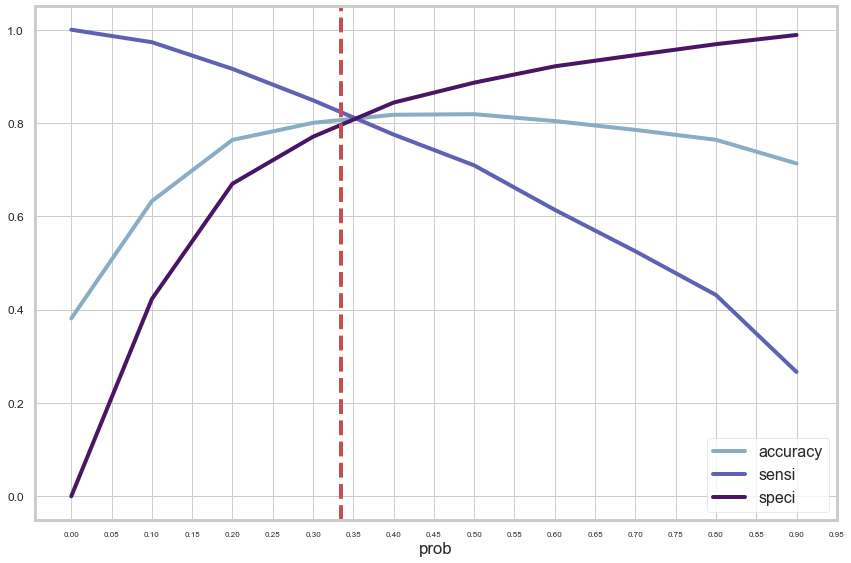

In [105]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.335, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b><br>
        From the above graph, 0.335 seems to be ideal cut-off points
    </span>   
</div>

In [106]:
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.335 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns
y_train_pred_final.head()

Converted_Value  Converted_Prob  final_predicted_1
0                0        0.523486                  1
1                0        0.113305                  0
2                0        0.336733                  1
3                0        0.818686                  1
4                0        0.292254                  0

In [107]:
# Let's assign Lead_score for the leads in Train Data Set
y_train_pred_final['lead_score_1']=(y_train_pred_final['Converted_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Converted_Prob',ascending=False)

Converted_Value  Converted_Prob  final_predicted_1  lead_score_1
3115                1        0.999473                  1            99
4891                1        0.999463                  1            99
1229                0        0.999170                  1            99
6312                1        0.999102                  1            99
6187                1        0.998930                  1            99
...               ...             ...                ...           ...
2016                0        0.004609                  0             0
4946                0        0.004449                  0             0
3282                0        0.004097                  0             0
1457                0        0.003618                  0             0
2474                0        0.003101                  0             0

[6468 rows x 4 columns]

<a id="confusion"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
           8.2 Confusion Matrix
            </span>   
        </font>    
</h2>

In [108]:
# Function for Confusion Matrix :
def draw_cm( actual, predicted, cmap ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.0f', cmap=cmap,
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels') 
    plt.show()

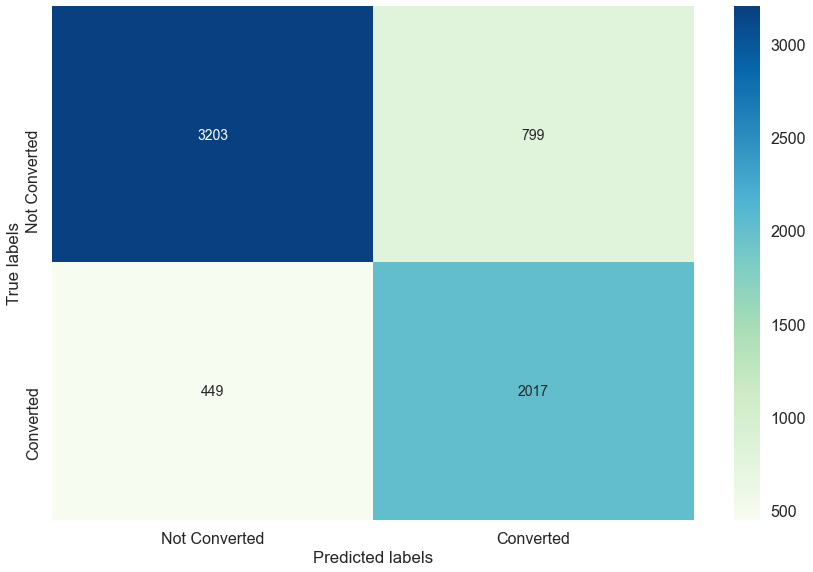

In [109]:
#Plotting the Confusion Matrix
draw_cm( y_train_pred_final['Converted_Value'], y_train_pred_final['final_predicted_1'], "GnBu")

In [110]:
conf_matrix = confusion_matrix(y_train_pred_final['Converted_Value'], y_train_pred_final['final_predicted_1'] )

lg_metrics(conf_matrix)

Model Accuracy value is              :  80.71 %
Model Sensitivity value is           :  81.79 %
Model Specificity value is           :  80.03 %
Model Precision value is             :  71.63 %
Model Recall value is                :  81.79 %
Model True Positive Rate (TPR)       :  81.79 %
Model False Positive Rate (FPR)      :  19.97 %
Model Poitive Prediction Value is    :  71.63 %
Model Negative Prediction value is   :  87.71 %


In [111]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_Value'], y_train_pred_final['final_predicted_1'] ) )

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4002
           1       0.72      0.82      0.76      2466

    accuracy                           0.81      6468
   macro avg       0.80      0.81      0.80      6468
weighted avg       0.82      0.81      0.81      6468



In [112]:
print("F1 Score: {}".format(f1_score(y_train_pred_final['Converted_Value'], y_train_pred_final['final_predicted_1'])))

F1 Score: 0.7637258614161304


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b><br>
        Model 5 is providing an Accuracy of 80.71%, Sensitivity of 81.79%. Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting. More than 80% is what the CEO has requested in this case study. 
        F1 Score and precision value in the model has higher number for 0's than 1's. This indicates that the model predicts leads which will not convert ( i.e. filtering leads who will not convert) than the leads which will convert. This indirectly improved the model's performance to identify correct leads to be contacted
    </span>   
</div>

<a id="ROC"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
           8.3 ROC Curve
            </span>   
        </font>    
</h2>

In [113]:
# Function to plot ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
# recoring the values FPR, TPR and Thresholds:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted_Value'], y_train_pred_final['Converted_Prob'] , drop_intermediate = False )

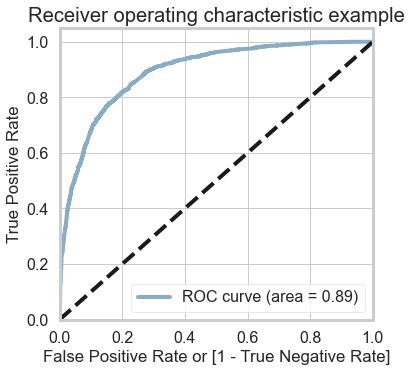

In [115]:
#plotting the ROC curve 
draw_roc(y_train_pred_final['Converted_Value'], y_train_pred_final['Converted_Prob'])

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b><br>
        ROC Curve aread is 0.89, which indicates that the model is good. 
    </span>   
</div>

<a id="tradeoff"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
           8.4 Precision - Recall Trade off
            </span>   
        </font>    
</h2>

<div>
    <span style ='font-family:Georgia'>
        Next we will look into Precision- Recall trade off to see if balancing these values provides better output. <br>
        Precision means out of all leads which are predicted at 1, how many have truly converted. <br>
        Recall means out of all leads that have converted, how many of them were correctly identifies as 1. This is the same value as sensitivity.<br><br>
        Precision-Recall trade-off point is used to decide the cut-off point especially when there is huge imbalance in data. In our case the data distribution is 62% vs 38%. So imbalance of data is not a big factor. 
    </span>
</div> 

In [116]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted_Value'], y_train_pred_final['Converted_Prob'])

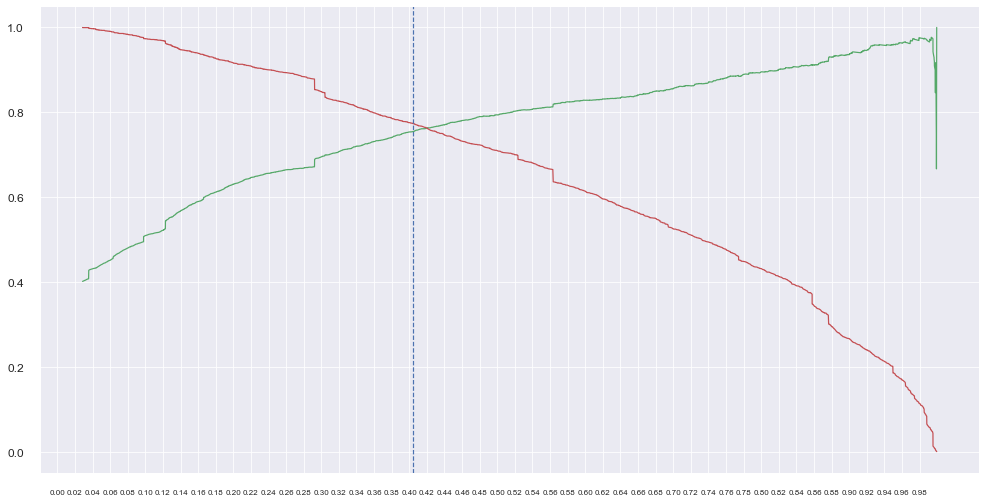

In [117]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.404, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b><br>
        Based on Precision- Recall Trade off curve, the cutoff point seems to 0.404. We will use this threshold value for Test Data Evaluation
    </span>   
</div>

In [118]:
# plotting the Train dataset again with 0.42 as cutoff
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.404 else 0)
y_train_pred_final.head()

Converted_Value  Converted_Prob  final_predicted_1  lead_score_1  \
0                0        0.523486                  1            52   
1                0        0.113305                  0            11   
2                0        0.336733                  1            33   
3                0        0.818686                  1            81   
4                0        0.292254                  0            29   

   final_predicted_2  
0                  1  
1                  0  
2                  0  
3                  1  
4                  0

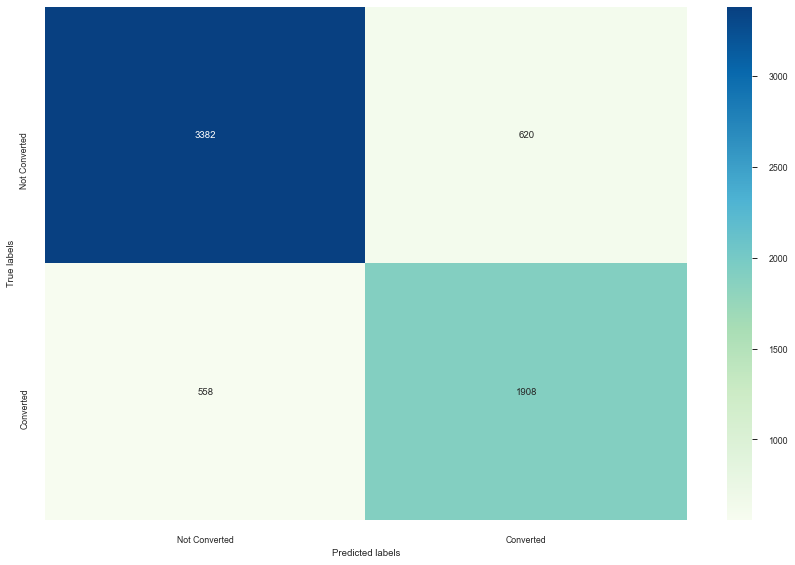

In [119]:
#Plotting the Confusion Matrix
draw_cm( y_train_pred_final['Converted_Value'], y_train_pred_final['final_predicted_2'], "GnBu")

In [120]:
#Data based on cutoff received from Precision-Recall Trade off
conf_matrix = confusion_matrix(y_train_pred_final['Converted_Value'], y_train_pred_final['final_predicted_2'] )
lg_metrics(conf_matrix)

Model Accuracy value is              :  81.79 %
Model Sensitivity value is           :  77.37 %
Model Specificity value is           :  84.51 %
Model Precision value is             :  75.47 %
Model Recall value is                :  77.37 %
Model True Positive Rate (TPR)       :  77.37 %
Model False Positive Rate (FPR)      :  15.49 %
Model Poitive Prediction Value is    :  75.47 %
Model Negative Prediction value is   :  85.84 %


In [121]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_Value'], y_train_pred_final['final_predicted_2'] ) )

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4002
           1       0.75      0.77      0.76      2466

    accuracy                           0.82      6468
   macro avg       0.81      0.81      0.81      6468
weighted avg       0.82      0.82      0.82      6468



<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b><br>
        By using the Precision - Recall trade off chart cut-off points, the model output has changed the following way : 
        <ul>
            <li> True Positive number has decreased. </li>
            <li> True Negative number has increase </li>
            <li> False Negative number has increase </li>
            <li> False Positive number has decreased </li>
        </ul>
    </span>
    <br><br>
    <span style='font-family:Georgia'>
        For our purpose CEO wants to identify the people correctly who will convert to leads. Thus, we cannot use Precision-Recall trade-off method as it reduced True Positive. We have to increase Sensitivity / Recall value to increase True Positives. Thus we will use 0.34 as cutoff point.
    </span>
</div>

<a id="modeleval2"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            9. Model Evalution : Test Dataset
            </span>   
        </font>    
</h1>

In [122]:
# Scaling the test dataset :
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4269             0     1.749143                     0.964504   
2376             0    -1.149699                    -0.885371   
7766             0     0.662077                    -0.777416   
9199             0    -1.149699                    -0.885371   
4359             0    -1.149699                    -0.885371   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
4269              2.117849                                    0   
2376             -1.266675                                    0   
7766              1.553761                                    0   
9199             -1.266675                                    0   
4359             -1.266675                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
4269                          0                        0   
2376                          1                        0   
7766                          0                        0   
9199                          0                        0   
4359                          1                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
4269                           0                     0                   0   
2376                           0                     0                   0   
7766                           0                     0                   1   
9199                           0                     0                   0   
4359                           0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
4269                       0                           0   
2376                       0                           0   
7766                       0                           0   
9199                       1                           0   
4359                       0                           0   

      Lead Source_Other Sources  Lead Source_Reference  \
4269                          0                      0   
2376                          0                      1   
7766                          0                      0   
9199                          0                      0   
4359                          0                      1   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
4269                           0                             0   
2376                           0                             0   
7766                           0                             0   
9199                           0                             0   
4359                           0                             0   

      Occupation_Housewife  Occupation_Other  Occupation_Student  \
4269                     0                 0                   0   
2376                     0                 0                   0   
7766                     0                 0                   0   
9199                     0                 0                   0   
4359                     0                 0                   0   

      Occupation_Unemployed  Occupation_Unknown  \
4269                      0                   1   
2376                      1                   0   
7766                      0                   0   
9199                      1                   0   
4359                      1                   0   

      Occupation_Working Professional  Last Activity_Email Bounced  \
4269                                0                            0   
2376                                0                            0   
7766                                1                            0   
9199                                0                            0   
4359                                0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
4269                                 0                           0   
2376

In [123]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[features]
X_test.head()

Do Not Email  Total Time Spent on Website  \
4269             0                     0.964504   
2376             0                    -0.885371   
7766             0                    -0.777416   
9199             0                    -0.885371   
4359             0                    -0.885371   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4269                                    0                          0   
2376                                    0                          1   
7766                                    0                          0   
9199                                    0                          0   
4359                                    0                          1   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
4269                       0                             0   
2376                       0                             0   
7766                       0                             0   
9199                       1                             0   
4359                       0                             0   

      Occupation_Unknown  Occupation_Working Professional  \
4269                   1                                0   
2376                   0                                0   
7766                   0                                1   
9199                   0                                0   
4359                   0                                0   

      Last Activity_Email Opened  Last Activity_Olark Chat Conversation  \
4269                           0                                      0   
2376                           0                                      0   
7766                           0                                      0   
9199                           0                                      1   
4359                           1                                      0   

      Last Activity_Other Activity  Last Activity_SMS Sent  \
4269                             0                       1   
2376                             0                       1   
7766                             0                       0   
9199                             0                       0   
4359                             0                       0   

      Last Activity_Unreachable  Last Activity_Unsubscribed  \
4269                          0                           0   
2376                          0                           0   
7766                          1                           0   
9199                          0                           0   
4359                          0                           0   

      Specialization_Hospitality Management  Specialization_Unknown  
4269                                      0                       1  
2376                                      0                       1  
7766                                      0                       0  
9199                                      0                       1  
4359                                      0                       0

In [124]:
#adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Occupation_Unknown', 'Occupation_Working Professional',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Unknown'],
      dtype='object')

In [125]:
# Predicting the final test model 
y_test_pred = log_model5.predict(X_test_sm)

In [126]:
#checking the top 10 rows
y_test_pred[:10]

4269    0.510782
2376    0.876272
7766    0.835646
9199    0.097968
4359    0.857860
9186    0.575200
1631    0.486538
8963    0.188242
8007    0.040380
5324    0.359446
dtype: float64

In [127]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.510782
2376  0.876272
7766  0.835646
9199  0.097968
4359  0.857860

In [128]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [129]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted         0
0          1  0.510782
1          1  0.876272
2          1  0.835646
3          0  0.097968
4          1  0.857860

In [130]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_Value'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Converted_Value','Converted_Prob'], axis=1)
y_pred_final.head()

Converted_Value  Converted_Prob
0                1        0.510782
1                1        0.876272
2                1        0.835646
3                0        0.097968
4                1        0.857860

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br>
        Now we will use Cutoff point of 0.335 from Sentivity - Specificity - Accuracy cut-off points
    </span>   
</div>

In [131]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.335 else 0)
y_pred_final.head()

Converted_Value  Converted_Prob  final_predicted
0                1        0.510782                1
1                1        0.876272                1
2                1        0.835646                1
3                0        0.097968                0
4                1        0.857860                1

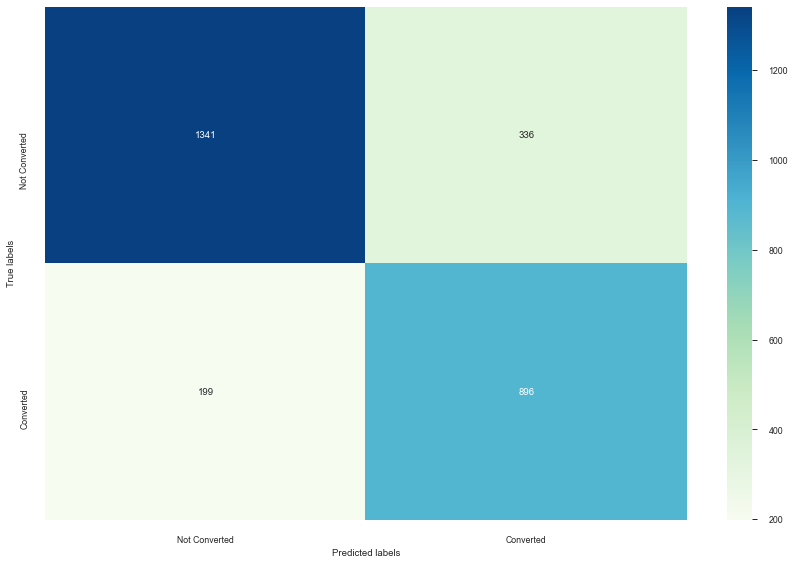

In [132]:
#Plotting the Confusion Matrix
draw_cm( y_pred_final['Converted_Value'], y_pred_final['final_predicted'], "GnBu")

In [133]:
conf_matrix = confusion_matrix(y_pred_final['Converted_Value'], y_pred_final['final_predicted'])

lg_metrics(conf_matrix)

Model Accuracy value is              :  80.7 %
Model Sensitivity value is           :  81.83 %
Model Specificity value is           :  79.96 %
Model Precision value is             :  72.73 %
Model Recall value is                :  81.83 %
Model True Positive Rate (TPR)       :  81.83 %
Model False Positive Rate (FPR)      :  20.04 %
Model Poitive Prediction Value is    :  72.73 %
Model Negative Prediction value is   :  87.08 %


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b><br>
        The sensitivity value on Test data is 81.83% vs 80.29% in Train data. The accuracy values is 80.7%. It shows that model is performing well in test data set also and is not over-trained. 
    </span>   
</div>

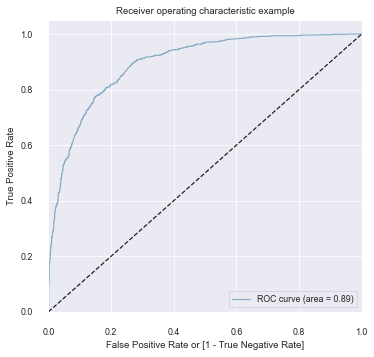

In [134]:
# Invoking the functio to draw ROC curve

draw_roc( y_pred_final['Converted_Value'], y_pred_final['Converted_Prob'])

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b><br>
        ROC value of 0.89 shows the model is performing well in Test dataset.  
    </span>   
</div>

In [135]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_pred_final['Converted_Value'], y_pred_final['final_predicted'] ) )

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1677
           1       0.73      0.82      0.77      1095

    accuracy                           0.81      2772
   macro avg       0.80      0.81      0.80      2772
weighted avg       0.81      0.81      0.81      2772



In [136]:
# Let's assign Lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

Converted_Value  Converted_Prob  final_predicted  lead_score
546                 1        0.999437                1          99
2405                1        0.998986                1          99
1026                1        0.998734                1          99
745                 1        0.998423                1          99
2589                1        0.997860                1          99
...               ...             ...              ...         ...
17                  0        0.006371                0           0
2034                0        0.003632                0           0
2521                0        0.003427                0           0
597                 0        0.002866                0           0
2443                0        0.002746                0           0

[2772 rows x 4 columns]

In [137]:
# checking the data from top 
y_pred_final.head(5)

Converted_Value  Converted_Prob  final_predicted  lead_score
0                1        0.510782                1          51
1                1        0.876272                1          87
2                1        0.835646                1          83
3                0        0.097968                0           9
4                1        0.857860                1          85

In [138]:
# checking the data from bottom 
y_pred_final.tail(5)

Converted_Value  Converted_Prob  final_predicted  lead_score
2767                0        0.036494                0           3
2768                1        0.876272                1          87
2769                0        0.292254                0          29
2770                0        0.131706                0          13
2771                1        0.876272                1          87

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b><br>
        We can use the lead_score column to identify which potential leads to prioritize first. The higher the score, the higher chances are there for the lead to convert. If there are limited sales representatives, then score cut-off should be higher to ensure a higher conversion probability people are contacted further to turn them into a potential customer. It is the same as increasing the precision value of the model by adjusting the cut-off point to a higher value. In case there are more resources available in the sales team (i.e., interns, etc. ), then the score cut-off can be lowered. As there are more human resources, the company can afford a higher rate of False positives as it will increase the customer outreach and, in turn, increase the potential customer who will take the online courses.  
    </span>   
</div>

<a id="conclusion"></a>
<h1>   
      <font color = blue >
            <span style='font-family:Georgia'>
            10. Conclusion:
            </span>   
        </font>    
</h1>

<a id="params"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
                10.1 Model Features / Predictors
            </span>   
        </font>    
</h2>

In [139]:
# Let's look into final model features and coefficients 
pd.options.display.float_format = '{:.2f}'.format
final_parameters = log_model5.params[1:]
final_parameters

Do Not Email                            -1.18
Total Time Spent on Website              1.07
Lead Origin_Landing Page Submission     -1.02
Lead Origin_Lead Add Form                2.80
Lead Source_Olark Chat                   1.10
Lead Source_Welingak Website             2.46
Occupation_Unknown                      -1.08
Occupation_Working Professional          2.40
Last Activity_Email Opened               0.73
Last Activity_Olark Chat Conversation   -0.61
Last Activity_Other Activity             2.24
Last Activity_SMS Sent                   1.87
Last Activity_Unreachable                0.85
Last Activity_Unsubscribed               1.39
Specialization_Hospitality Management   -1.00
Specialization_Unknown                  -0.98
dtype: float64

In [140]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors.sort_values()

Do Not Email                            -42.14
Occupation_Unknown                      -38.60
Lead Origin_Landing Page Submission     -36.49
Specialization_Hospitality Management   -35.50
Specialization_Unknown                  -34.91
Last Activity_Olark Chat Conversation   -21.65
Last Activity_Email Opened               26.00
Last Activity_Unreachable                30.28
Total Time Spent on Website              38.00
Lead Source_Olark Chat                   39.22
Last Activity_Unsubscribed               49.61
Last Activity_SMS Sent                   66.62
Last Activity_Other Activity             79.98
Occupation_Working Professional          85.50
Lead Source_Welingak Website             87.87
Lead Origin_Lead Add Form               100.00
dtype: float64

<a id="summary"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
                10.2 Inferences and Recommendations
            </span>   
        </font>    
</h2>


<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Major indicators that a lead will get converted to a hot lead: </b> 
        <ol>
            <li>Lead Origin_Lead Add Form : A lead sourced from Lead Origin_Lead Add Form is more likely to get converted</li>
            <li>Occupation_Working Professional :- Working professionals are more likely to get converted.</li>
            <li>Lead_Source_Welingak website : A lead sourced from Welingak Website is more likely to get converted.</li>
            <li>Last Activity_SMS Sent :A lead having SMS sent previously are more likely to get converted. </li>
            <li>Lead Source_Olark Chat :A lead sourced from Olark Chat is more likely to get converted </li>
<b>Major indicators that a lead will NOT get converted to a hot lead: </b> 
        <ol>
            <li>Last_Activity_Olark chat conversation : Customer who had olark chat conversion, are less likely to get converted into hot leads.</li>
            <li>Lead Ongin_Landmg Page Submission : Customer who hadLead Ongin_Landmg Page Submission, are less likely to get converted into hot leads .</li>
           <li>Do Not Email :Customer who choose Do Not Email, are less likely to get converted into hot leads .</li> </li>
<b>Recommendations: </b> 
<ol>
            <li>The company should use a leads score threshold of 34 to identify "Hot Leads" as at this threshold, Sensitivity Score of the model is around 81% which is as good as CEO's target of 80%.</li>
     </ol>
    </span>    
</div>